# UA/NKE Geolocation Research

# Part 1: Data Wrangling

In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from datetime import datetime, timedelta

# show the plots
%matplotlib inline
# show all columns
pd.set_option('display.max_columns', None)
# set the backgraound
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":24,"axes.labelsize":18,
                             "xtick.labelsize":15,"ytick.labelsize":15}) 

## 1. Geolocation (Customer Traffic)

### 1.1 Preparation 

In [2]:
ua = pd.read_csv('UA_Geo.csv')
nike = pd.read_csv('NIKE_Geo.csv')
ua.head()

,Unnamed: 0,UTCtimestamp,advertisingID,deviceLatitude,deviceLongitude,id,latitude,longitude
0,0,1514767636186,772BA92E-F773-4EEB-9C56-48B64B833DCF,41.89330,-87.62446,19,41.89269,-87.62455
1,1,1514766265060,7415AAF3-6878-4177-BB71-58C8ABD1A94E,41.89205,-87.62421,19,41.89269,-87.62455
2,2,1514767647000,772BA92E-F773-4EEB-9C56-48B64B833DCF,41.89330,-87.62449,19,41.89269,-87.62455
3,3,1514771519003,7DC33D5D-7902-4AB7-AB59-E569A87A2FD7,36.05305,-115.16940,33,36.05271,-115.16950
4,4,1514771522614,7DC33D5D-7902-4AB7-AB59-E569A87A2FD7,36.05305,-115.16940,33,36.05271,-115.16950


In [3]:
# drop repeated or independent features
ua.drop(['Unnamed: 0', 'latitude', 'longitude'], axis = 1, inplace = True)
nike.drop(['Unnamed: 0', 'latitude', 'longitude'], axis = 1, inplace = True)

In [4]:
print(ua.shape)
print(nike.shape)

(2873531, 5)
(2214794, 5)


In [5]:
ua.head()

,UTCtimestamp,advertisingID,deviceLatitude,deviceLongitude,id
0,1514767636186,772BA92E-F773-4EEB-9C56-48B64B833DCF,41.89330,-87.62446,19
1,1514766265060,7415AAF3-6878-4177-BB71-58C8ABD1A94E,41.89205,-87.62421,19
2,1514767647000,772BA92E-F773-4EEB-9C56-48B64B833DCF,41.89330,-87.62449,19
3,1514771519003,7DC33D5D-7902-4AB7-AB59-E569A87A2FD7,36.05305,-115.16940,33
4,1514771522614,7DC33D5D-7902-4AB7-AB59-E569A87A2FD7,36.05305,-115.16940,33


### 1.2 Plots of Geolocation Data

#### Data Manipulation

In [6]:
ua['time'] = pd.DatetimeIndex(pd.to_datetime(ua['UTCtimestamp'], unit = 'ms')).tz_localize('UTC') # convert
ua = ua.set_index('time')
ua.index = ua.index.tz_convert('America/New_York').tz_localize(None) # set the timezone EST
ua['ua_count'] = 1 # set a column for count
ua.head()

,UTCtimestamp,advertisingID,deviceLatitude,deviceLongitude,id,ua_count
time,,,,,,
2017-12-31 19:47:16.186,1514767636186,772BA92E-F773-4EEB-9C56-48B64B833DCF,41.89330,-87.62446,19,1
2017-12-31 19:24:25.060,1514766265060,7415AAF3-6878-4177-BB71-58C8ABD1A94E,41.89205,-87.62421,19,1
2017-12-31 19:47:27.000,1514767647000,772BA92E-F773-4EEB-9C56-48B64B833DCF,41.89330,-87.62449,19,1
2017-12-31 20:51:59.003,1514771519003,7DC33D5D-7902-4AB7-AB59-E569A87A2FD7,36.05305,-115.16940,33,1
2017-12-31 20:52:02.614,1514771522614,7DC33D5D-7902-4AB7-AB59-E569A87A2FD7,36.05305,-115.16940,33,1


In [7]:
ua.tail()

,UTCtimestamp,advertisingID,deviceLatitude,deviceLongitude,id,ua_count
time,,,,,,
2018-06-17 18:16:31.948,1529273791948,9943E1E9-379E-4E9F-BA98-47538C230217,29.92388,-81.41736,14,1
2018-06-17 18:37:48.617,1529275068617,64362F68-8DEC-4624-BCF2-C51D2038BFA3,29.92456,-81.41754,14,1
2018-06-17 18:37:56.000,1529275076000,64362F68-8DEC-4624-BCF2-C51D2038BFA3,29.92429,-81.41711,14,1
2018-06-17 19:03:38.448,1529276618448,61F4FB1B-8FC3-4EFF-B9B1-1886211CC9B3,29.92470,-81.41756,14,1
2018-06-17 19:46:07.050,1529279167050,AE78F1CF-C113-41C8-8F28-3BFC0E2F1A0E,29.92455,-81.41660,14,1


In [8]:
ua = ua['2018'] # keep data in 2018
ua.shape

(2870757, 6)

In [9]:
nike['time'] = pd.DatetimeIndex(pd.to_datetime(nike['UTCtimestamp'], unit='ms')).tz_localize('UTC')
nike = nike.set_index('time')
nike['nike_count'] = 1
nike.index = nike.index.tz_convert('America/New_York').tz_localize(None)
nike = nike['2018']
nike.shape

(2212528, 6)

#### 30-min Geolocation Plot

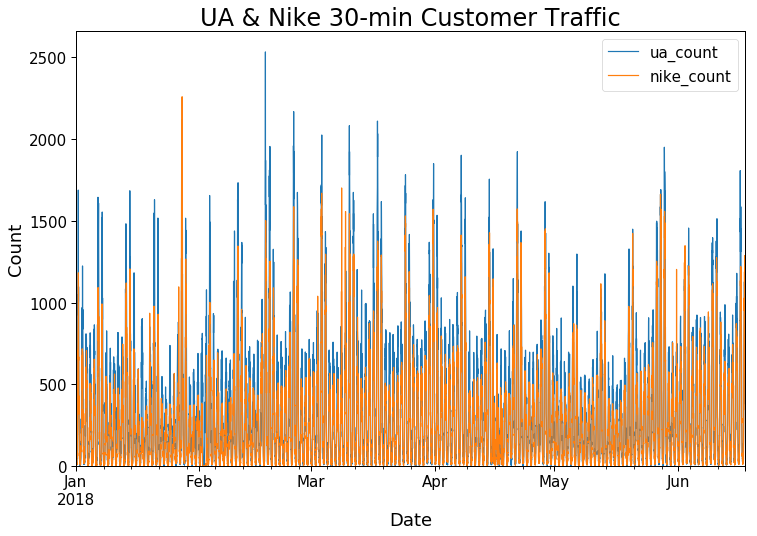

In [10]:
figure(figsize = (12,8)) # set figure size

ua['ua_count'].resample('30T').sum().plot() # set a unit for 30 minutes
nike['nike_count'].resample('30T').sum().plot()

plt.title('UA & Nike 30-min Customer Traffic')
plt.ylabel('Count')
plt.xlabel('Date')
plt.legend(loc=1, prop={'size': 15})
plt.ylim(bottom=0) 

plt.show()

#### 3-hour Geolocation Plot

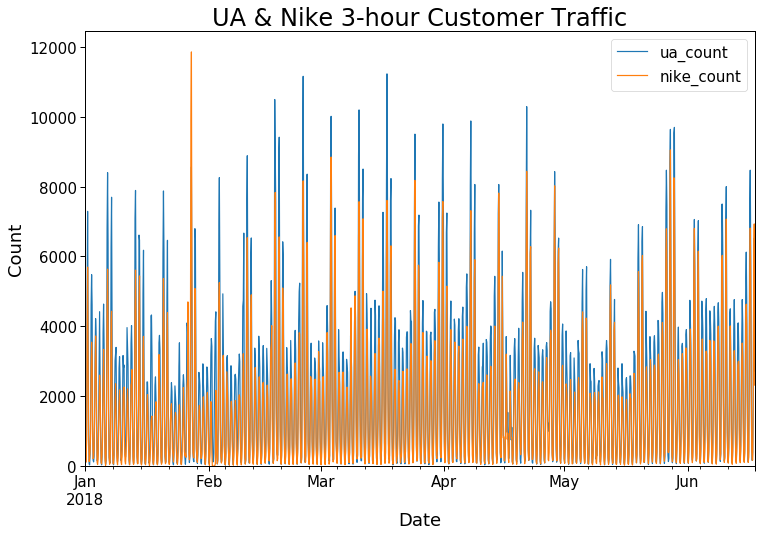

In [11]:
figure(figsize = (12,8))

ua['ua_count'].resample('3H').sum().plot() # set a unit for 3 hours
nike['nike_count'].resample('3H').sum().plot()

plt.title('UA & Nike 3-hour Customer Traffic')
plt.ylabel('Count')
plt.xlabel('Date')
plt.legend(loc=1, prop={'size': 15})
plt.ylim(bottom=0) 

plt.show()

#### Daily Geolocation Plot

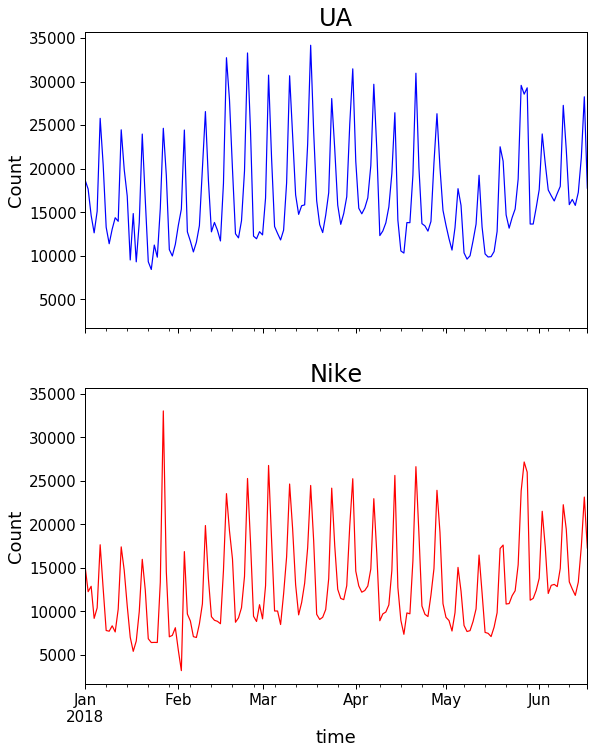

In [12]:
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(9,12)) # share x-axis & y-axis

ua['ua_count'].resample('D').sum().plot(color='blue', ax=ax[0]) # create daily gap
nike['nike_count'].resample('D').sum().plot(color='red', ax=ax[1])
 
ax[0].set_title('UA')
ax[1].set_title('Nike')
ax[0].set_ylabel('Count')
ax[1].set_ylabel('Count')

plt.show()

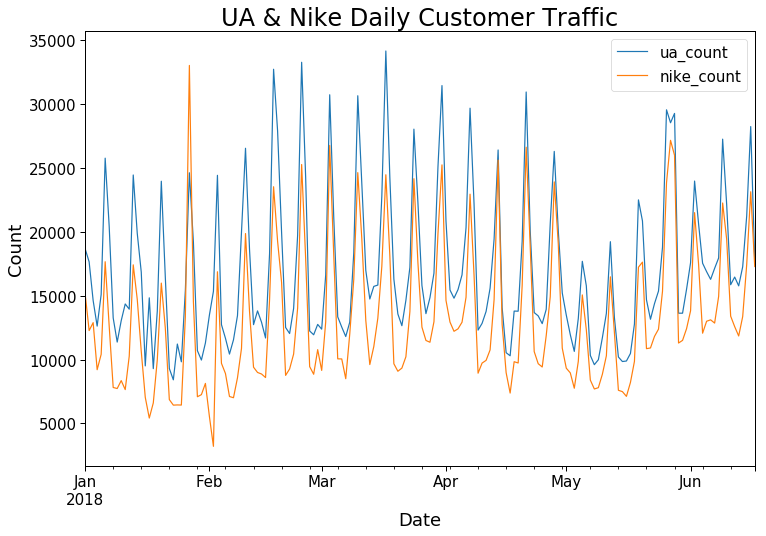

In [13]:
figure(figsize = (12,8))

ua['ua_count'].resample('D').sum().plot()
nike['nike_count'].resample('D').sum().plot()
plt.title('UA & Nike Daily Customer Traffic')

plt.ylabel('Count')
plt.xlabel('Date')
plt.legend(loc=1, prop={'size': 15})

plt.show()

#### Weekly Geolocation Plot

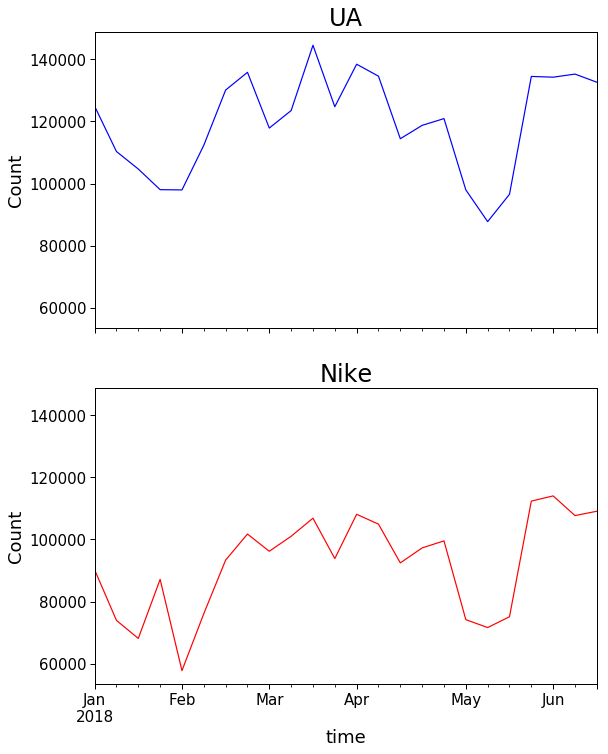

In [14]:
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(9, 12))

ua['ua_count'].resample('W').sum().plot(color = 'blue', ax=ax[0])
nike['nike_count'].resample('W').sum().plot(color = 'red', ax=ax[1])

ax[0].set_title('UA')
ax[1].set_title('Nike')
ax[0].set_ylabel('Count')
ax[1].set_ylabel('Count')

plt.show()

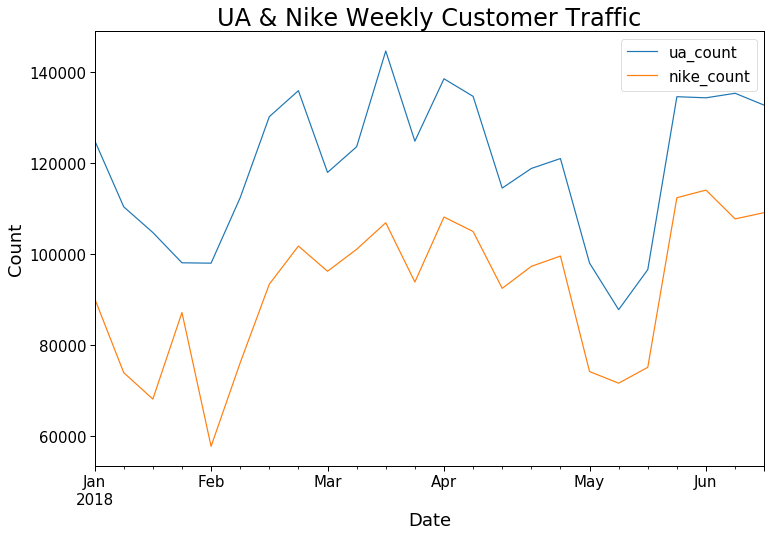

In [15]:
figure(figsize = (12,8))
ua['ua_count'].resample('W').sum().plot()
nike['nike_count'].resample('W').sum().plot()
plt.title('UA & Nike Weekly Customer Traffic')
plt.ylabel('Count')
plt.xlabel('Date')
plt.legend(loc=1, prop={'size': 15})
plt.show()

## 2. Stock & Twitter Data

### 2.1 Preparation

In [16]:
uatwt_stk = pd.read_csv('UA_Tweet.csv', parse_dates=['Date'], index_col='Date').sort_index()['2018-01-01':'2018-06-17']
uatwt_stk.head()

,Lst Trd/Lst Px,Volume,Twttr Sent,Twttr Sent(Real time),Twttr Pub Cnt,Twttr Neut Sent
Date,,,,,,
2018-01-02 04:00:00,NaN,NaN,NaN,0.0000,NaN,NaN
2018-01-02 05:00:00,NaN,NaN,NaN,0.0732,3.0,1.0
2018-01-02 05:30:00,NaN,NaN,NaN,0.0000,NaN,NaN
2018-01-02 06:30:00,NaN,NaN,NaN,NaN,1.0,1.0
2018-01-02 07:00:00,NaN,NaN,NaN,NaN,4.0,4.0


In [17]:
niketwt_stk = pd.read_csv('NIKE_Tweet.csv', parse_dates=['Date'], index_col='Date').sort_index()['2018-01-01':'2018-06-17']
niketwt_stk.tail()

,Lst Trd/Lst Px,Volume,Twttr Sent,Twttr Sent(Real time),Twttr Pub Cnt,Twttr Neut Sent
Date,,,,,,
2018-06-15 17:30:00,75.99,600,75.99,NaN,6.0,6.0
2018-06-15 18:00:00,NaN,NaN,NaN,0.0899,7.0,4.0
2018-06-15 18:30:00,75.84,0,75.84,0.0000,2.0,2.0
2018-06-15 19:00:00,NaN,NaN,NaN,-0.0549,6.0,2.0
2018-06-15 19:30:00,75.84,300,75.84,0.0000,8.0,8.0


In [18]:
print(uatwt_stk.Volume.dtype)
print(niketwt_stk.Volume.dtype)

object
object


In [19]:
uatwt_stk.Volume.str.extract('([a-zA-Z])', expand=False).value_counts()

k    1477
M     122
Name: Volume, dtype: int64

In [20]:
niketwt_stk.Volume.str.extract('([a-zA-Z])', expand=False).value_counts()

k    1497
M     125
Name: Volume, dtype: int64

In [21]:
# adjust the units of Volume
ua_num = uatwt_stk.Volume.str.extract('(\d+(\.\d+)?)', expand=False).iloc[:,0].astype('float64') # get number
ua_unit = uatwt_stk.Volume.str.extract('([a-zA-Z])', expand=False) # get unit
ua_unit = np.where(ua_unit=='M', 1000000, np.where(ua_unit=='k', 1000, np.where(np.isnan(ua_num), 0, 1)))
uatwt_stk.Volume = ua_num * ua_unit

nike_num = niketwt_stk.Volume.str.extract('(\d+(\.\d+)?)', expand=False).iloc[:,0].astype('float64')
nike_unit = niketwt_stk.Volume.str.extract('([a-zA-Z])', expand=False)
nike_unit = np.where(nike_unit=='M', 1000000, np.where(nike_unit=='k', 1000, np.where(np.isnan(nike_num), 0, 1)))
niketwt_stk.Volume = nike_num * nike_unit

print(uatwt_stk.Volume.dtype)
print(niketwt_stk.Volume.dtype)

float64
float64


In [22]:
print(uatwt_stk.shape)
print(niketwt_stk.shape)

(3460, 6)
(3624, 6)


In [23]:
uatwt_stk.rename(columns = {'Twttr Sent(Real time)':'ua_tweet',
                            'Lst Trd/Lst Px':'ua_price',
                            'Volume':'ua_stkv',
                            'Twttr Pub Cnt':'ua_twtcount'}, 
                 inplace = True)

niketwt_stk.rename(columns = {'Twttr Sent(Real time)':'nike_tweet',
                              'Lst Trd/Lst Px':'nike_price',
                              'Volume':'nike_stkv',
                              'Twttr Pub Cnt':'nike_twtcount'}, 
                 inplace = True)

In [24]:
uatwt_stk.head()

,ua_price,ua_stkv,Twttr Sent,ua_tweet,ua_twtcount,Twttr Neut Sent
Date,,,,,,
2018-01-02 04:00:00,NaN,NaN,NaN,0.0000,NaN,NaN
2018-01-02 05:00:00,NaN,NaN,NaN,0.0732,3.0,1.0
2018-01-02 05:30:00,NaN,NaN,NaN,0.0000,NaN,NaN
2018-01-02 06:30:00,NaN,NaN,NaN,NaN,1.0,1.0
2018-01-02 07:00:00,NaN,NaN,NaN,NaN,4.0,4.0


In [25]:
niketwt_stk.head()

,nike_price,nike_stkv,Twttr Sent,nike_tweet,nike_twtcount,Twttr Neut Sent
Date,,,,,,
2018-01-02 04:00:00,NaN,NaN,NaN,NaN,5.0,5.0
2018-01-02 04:30:00,NaN,NaN,NaN,NaN,2.0,2.0
2018-01-02 05:00:00,62.36,641.0,62.36,NaN,4.0,4.0
2018-01-02 05:30:00,NaN,NaN,NaN,NaN,1.0,1.0
2018-01-02 06:00:00,NaN,NaN,NaN,NaN,13.0,13.0


### 2.2 Twitter

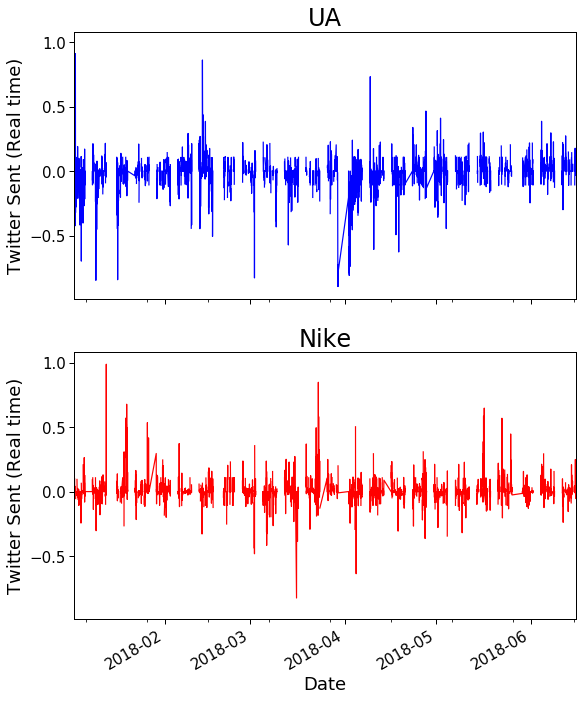

In [26]:
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(9, 12))

uatwt_stk['ua_tweet'].plot(color='blue', ax=ax[0])
niketwt_stk['nike_tweet'].plot(color='red', ax=ax[1])

ax[0].set_title('UA')
ax[1].set_title('Nike')
ax[0].set_ylabel('Twitter Sent (Real time)')
ax[1].set_ylabel('Twitter Sent (Real time)')

plt.show()

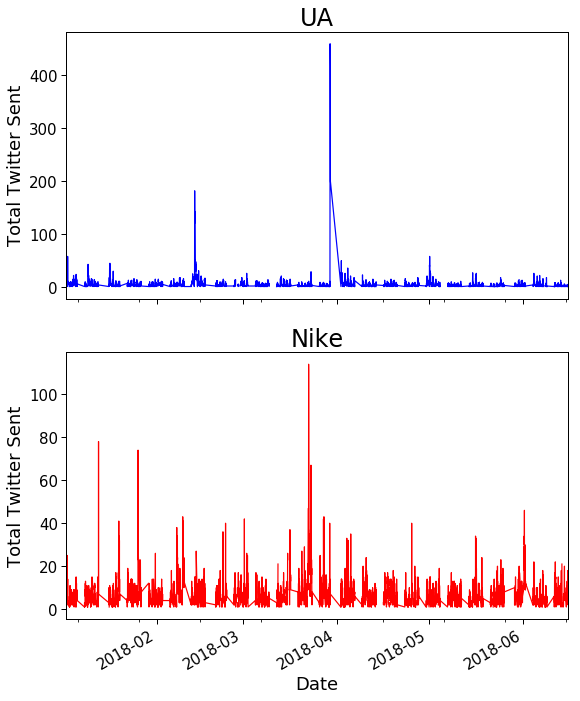

In [27]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(9, 12))

uatwt_stk['ua_twtcount'].plot(color='blue', ax=ax[0])
niketwt_stk['nike_twtcount'].plot(color='red', ax=ax[1])

ax[0].set_title('UA')
ax[1].set_title('Nike')
ax[0].set_ylabel('Total Twitter Sent')
ax[1].set_ylabel('Total Twitter Sent')

plt.show()

### 2.3 Stock

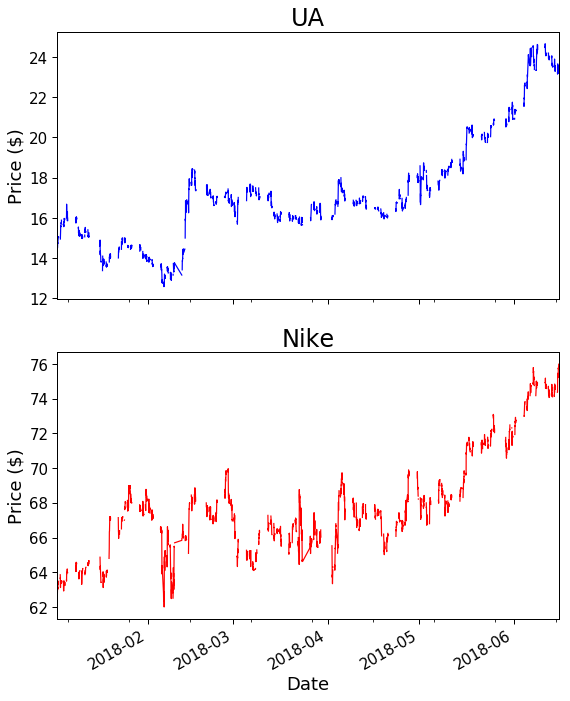

In [28]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(9, 12))

uatwt_stk['ua_price'].plot(color='blue', ax=ax[0])
niketwt_stk['nike_price'].plot(color='red', ax=ax[1])

ax[0].set_title('UA')
ax[1].set_title('Nike')
ax[0].set_ylabel('Price ($)')
ax[1].set_ylabel('Price ($)')

plt.show()

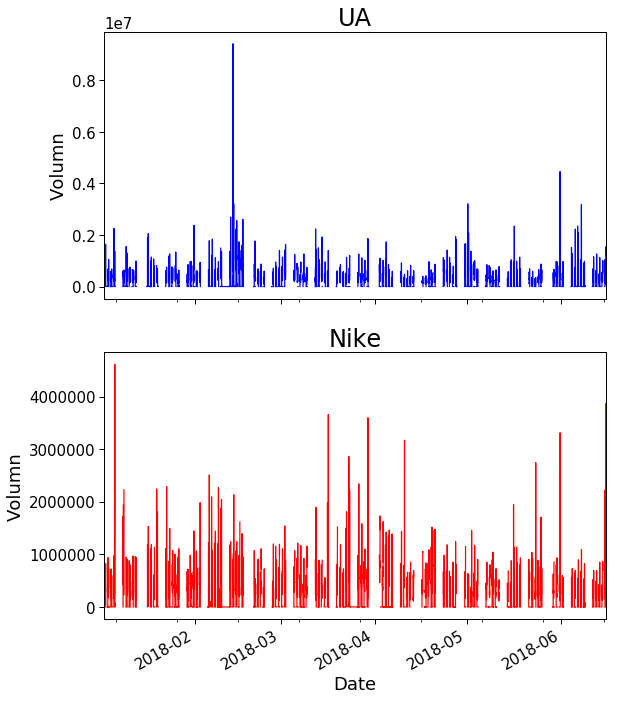

In [29]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(9, 12))

uatwt_stk['ua_stkv'].plot(color='blue', ax=ax[0])
niketwt_stk['nike_stkv'].plot(color='red', ax=ax[1])

ax[0].set_title('UA')
ax[1].set_title('Nike')
ax[0].set_ylabel('Volumn')
ax[1].set_ylabel('Volumn')

plt.show()

## 3. Putting All Features Together

### 3.1 Create a New Dataset

In [30]:
alldata = pd.concat([ua['ua_count'].resample('30T').sum(), 
                    nike['nike_count'].resample('30T').sum(),
                    uatwt_stk['ua_price'], niketwt_stk['nike_price'],
                    uatwt_stk['ua_stkv'],niketwt_stk['nike_stkv'],
                    uatwt_stk['ua_tweet'],niketwt_stk['nike_tweet'],
                    uatwt_stk['ua_twtcount'],niketwt_stk['nike_twtcount']
                   ], axis=1)

alldata = alldata['2018'] # just use data in 2018

In [31]:
alldata.shape

(8056, 10)

In [32]:
alldata.head()

,ua_count,nike_count,ua_price,nike_price,ua_stkv,nike_stkv,ua_tweet,nike_tweet,ua_twtcount,nike_twtcount
2018-01-01 00:00:00,75,110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 00:30:00,89,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 01:00:00,100,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 01:30:00,107,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 02:00:00,131,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
alldata.tail()

,ua_count,nike_count,ua_price,nike_price,ua_stkv,nike_stkv,ua_tweet,nike_tweet,ua_twtcount,nike_twtcount
2018-06-17 17:30:00,1015,940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-17 18:00:00,874,874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-17 18:30:00,724,663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-17 19:00:00,740,436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-17 19:30:00,382,346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
alldata.index.name = 'time'
alldata['count_ratio'] = alldata['ua_count'] / alldata['nike_count']
alldata['price_ratio'] = alldata['ua_price'] / alldata['nike_price']
alldata['tweet_diff'] = alldata['ua_tweet'] - alldata['nike_tweet']
alldata['stkv_ratio'] = alldata['ua_stkv'] / alldata['nike_stkv']
alldata['twtcount_ratio'] = alldata['ua_twtcount'] / alldata['nike_twtcount']
alldata.head()

,ua_count,nike_count,ua_price,nike_price,ua_stkv,nike_stkv,ua_tweet,nike_tweet,ua_twtcount,nike_twtcount,count_ratio,price_ratio,tweet_diff,stkv_ratio,twtcount_ratio
time,,,,,,,,,,,,,,,
2018-01-01 00:00:00,75,110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.681818,NaN,NaN,NaN,NaN
2018-01-01 00:30:00,89,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.435484,NaN,NaN,NaN,NaN
2018-01-01 01:00:00,100,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.564103,NaN,NaN,NaN,NaN
2018-01-01 01:30:00,107,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.320988,NaN,NaN,NaN,NaN
2018-01-01 02:00:00,131,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.336735,NaN,NaN,NaN,NaN


In [35]:
alldata.shape

(8056, 15)

In [36]:
alldata.to_csv("alldata.csv", sep=',')

In [37]:
alldata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8056 entries, 2018-01-01 00:00:00 to 2018-06-17 19:30:00
Data columns (total 15 columns):
ua_count          8056 non-null int64
nike_count        8056 non-null int64
ua_price          2352 non-null float64
nike_price        2534 non-null float64
ua_stkv           2352 non-null float64
nike_stkv         2534 non-null float64
ua_tweet          2297 non-null float64
nike_tweet        2495 non-null float64
ua_twtcount       3250 non-null float64
nike_twtcount     3523 non-null float64
count_ratio       8053 non-null float64
price_ratio       2142 non-null float64
tweet_diff        1649 non-null float64
stkv_ratio        2031 non-null float64
twtcount_ratio    3174 non-null float64
dtypes: float64(13), int64(2)
memory usage: 1007.0 KB


### 3.2 Using the Dataset

In [38]:
alldata = pd.read_csv('alldata.csv', parse_dates=['time'], index_col='time')
alldata.head()

,ua_count,nike_count,ua_price,nike_price,ua_stkv,nike_stkv,ua_tweet,nike_tweet,ua_twtcount,nike_twtcount,count_ratio,price_ratio,tweet_diff,stkv_ratio,twtcount_ratio
time,,,,,,,,,,,,,,,
2018-01-01 00:00:00,75,110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.681818,NaN,NaN,NaN,NaN
2018-01-01 00:30:00,89,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.435484,NaN,NaN,NaN,NaN
2018-01-01 01:00:00,100,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.564103,NaN,NaN,NaN,NaN
2018-01-01 01:30:00,107,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.320988,NaN,NaN,NaN,NaN
2018-01-01 02:00:00,131,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.336735,NaN,NaN,NaN,NaN


#### 30-min Data Plots

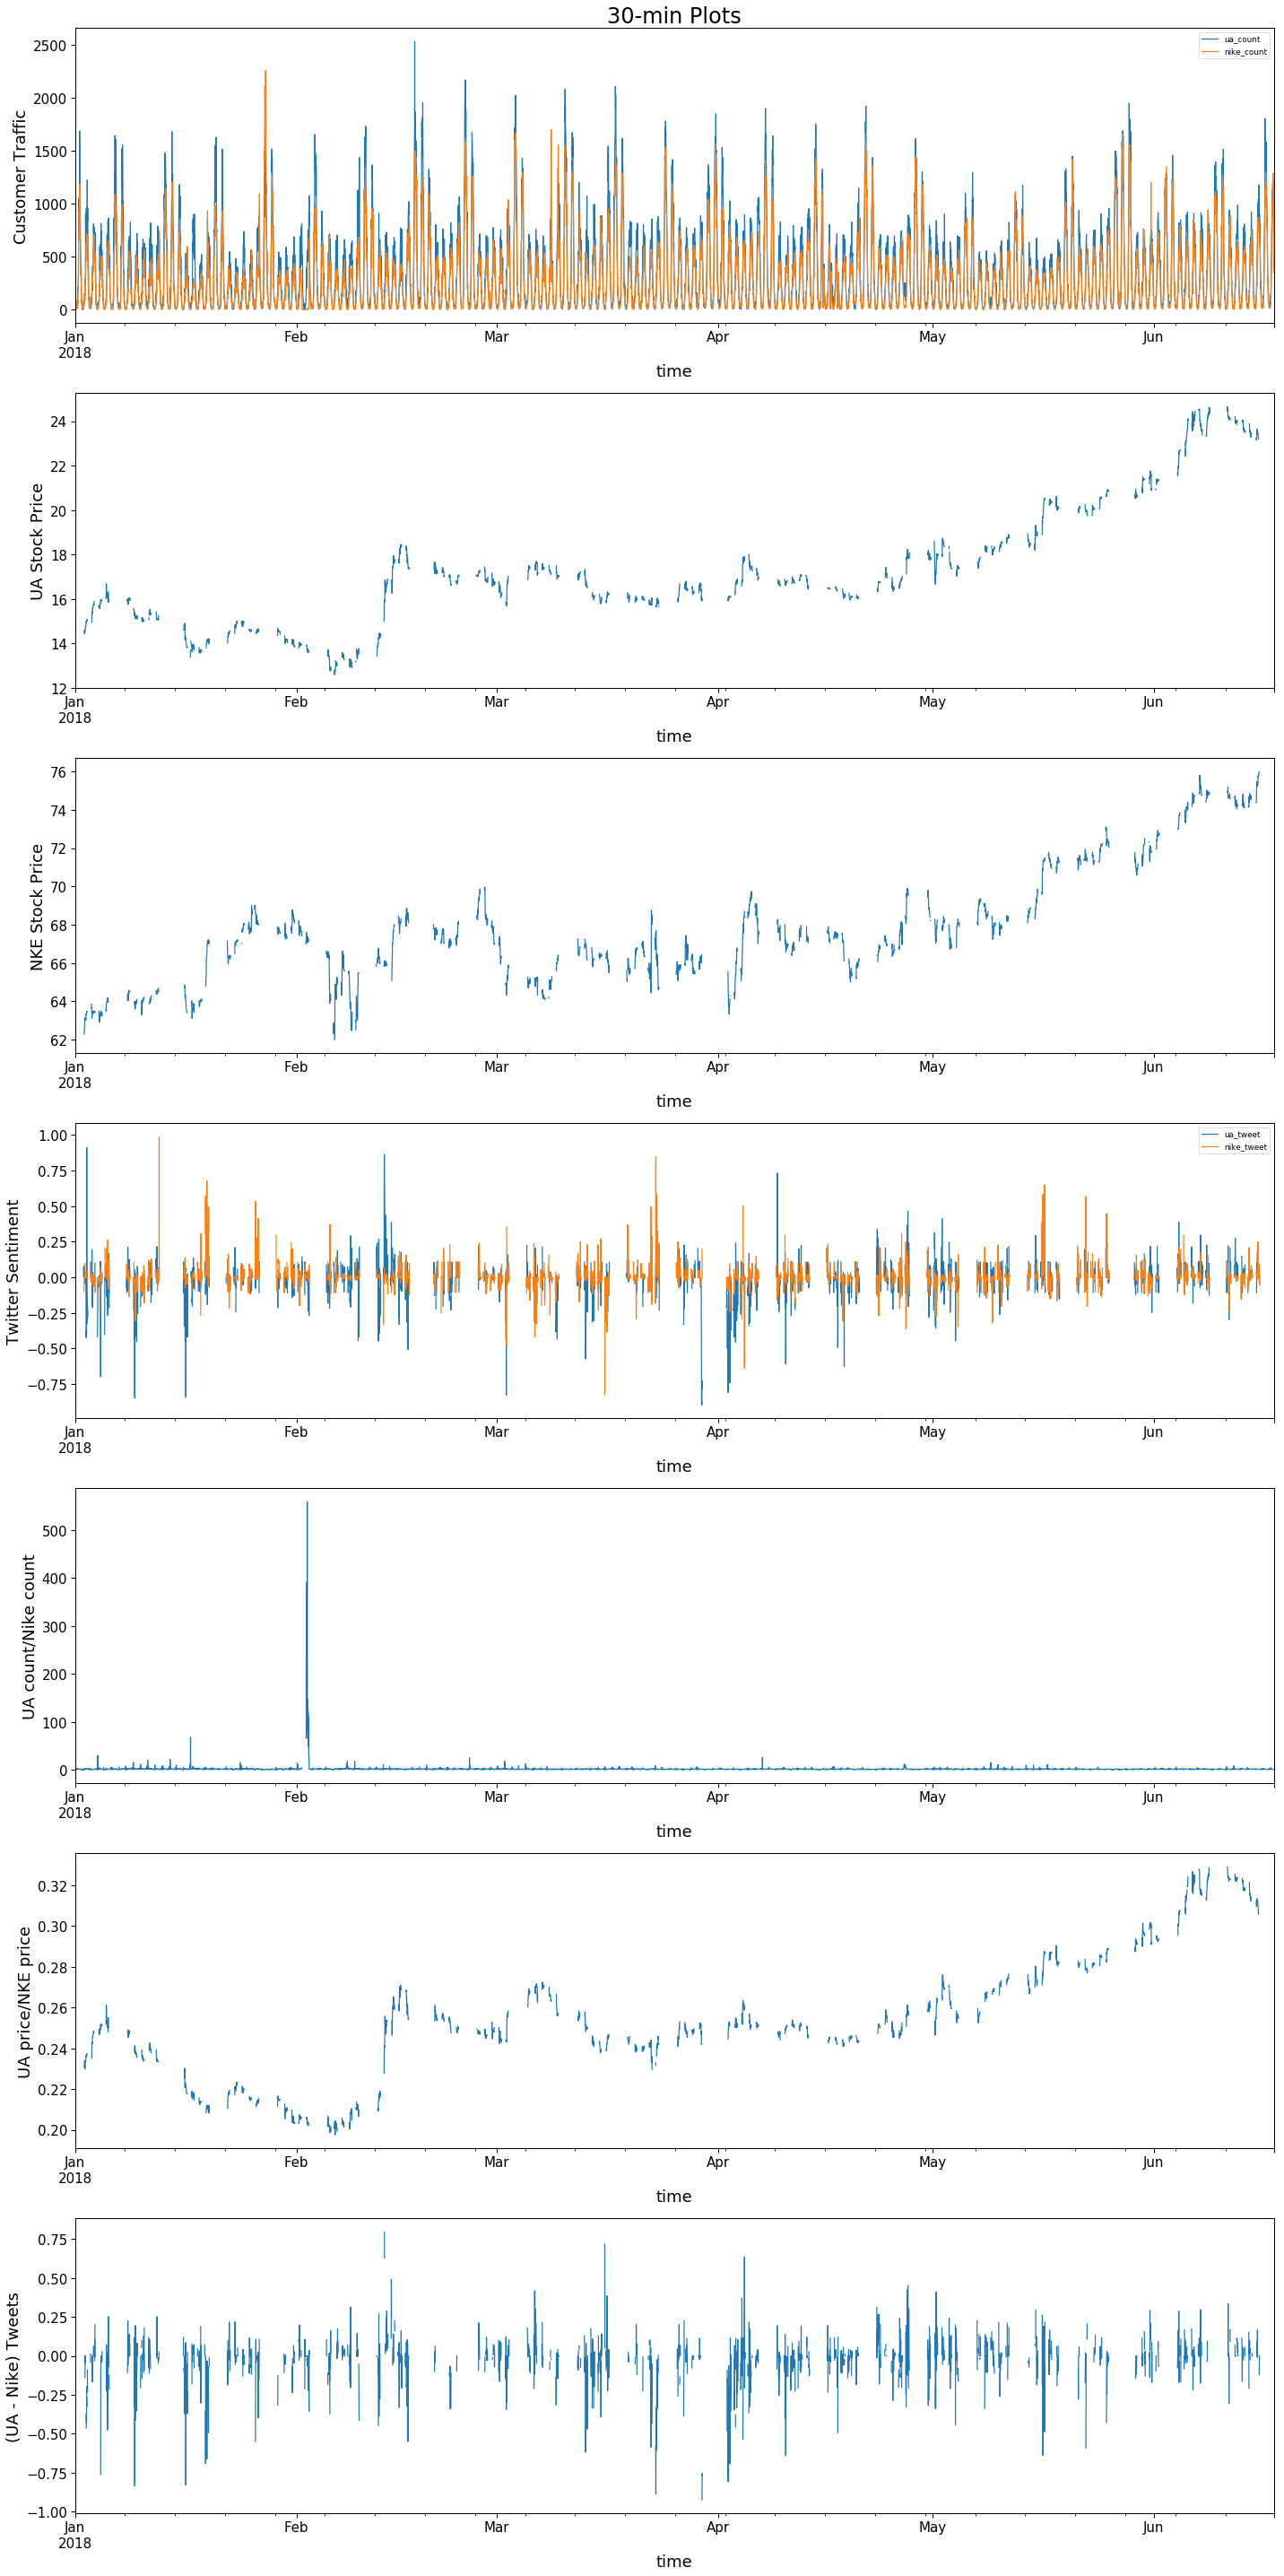

In [39]:
fig=plt.figure(figsize=(20,40))

axes1=fig.add_subplot(7,1,1)
alldata[['ua_count','nike_count']].plot(ax=axes1)

axes2=fig.add_subplot(7,1,2)
alldata['ua_price'].plot(ax=axes2)

axes3=fig.add_subplot(7,1,3)
alldata['nike_price'].plot(ax=axes3)

axes4=fig.add_subplot(7,1,4)
alldata[['ua_tweet', 'nike_tweet']].plot(ax=axes4)

axes5=fig.add_subplot(7,1,5)
alldata['count_ratio'].plot(ax=axes5)

axes6=fig.add_subplot(7,1,6)
alldata['price_ratio'].plot(ax=axes6)

axes7=fig.add_subplot(7,1,7)
alldata['tweet_diff'].plot(ax=axes7)

axes1.set_ylabel('Customer Traffic')
axes2.set_ylabel('UA Stock Price')
axes3.set_ylabel('NKE Stock Price')
axes4.set_ylabel('Twitter Sentiment')
axes5.set_ylabel('UA count/Nike count')
axes6.set_ylabel('UA price/NKE price')
axes7.set_ylabel('(UA - Nike) Tweets')

axes1.set_title('30-min Plots')

plt.tight_layout()  

#### Hourly Data Plots

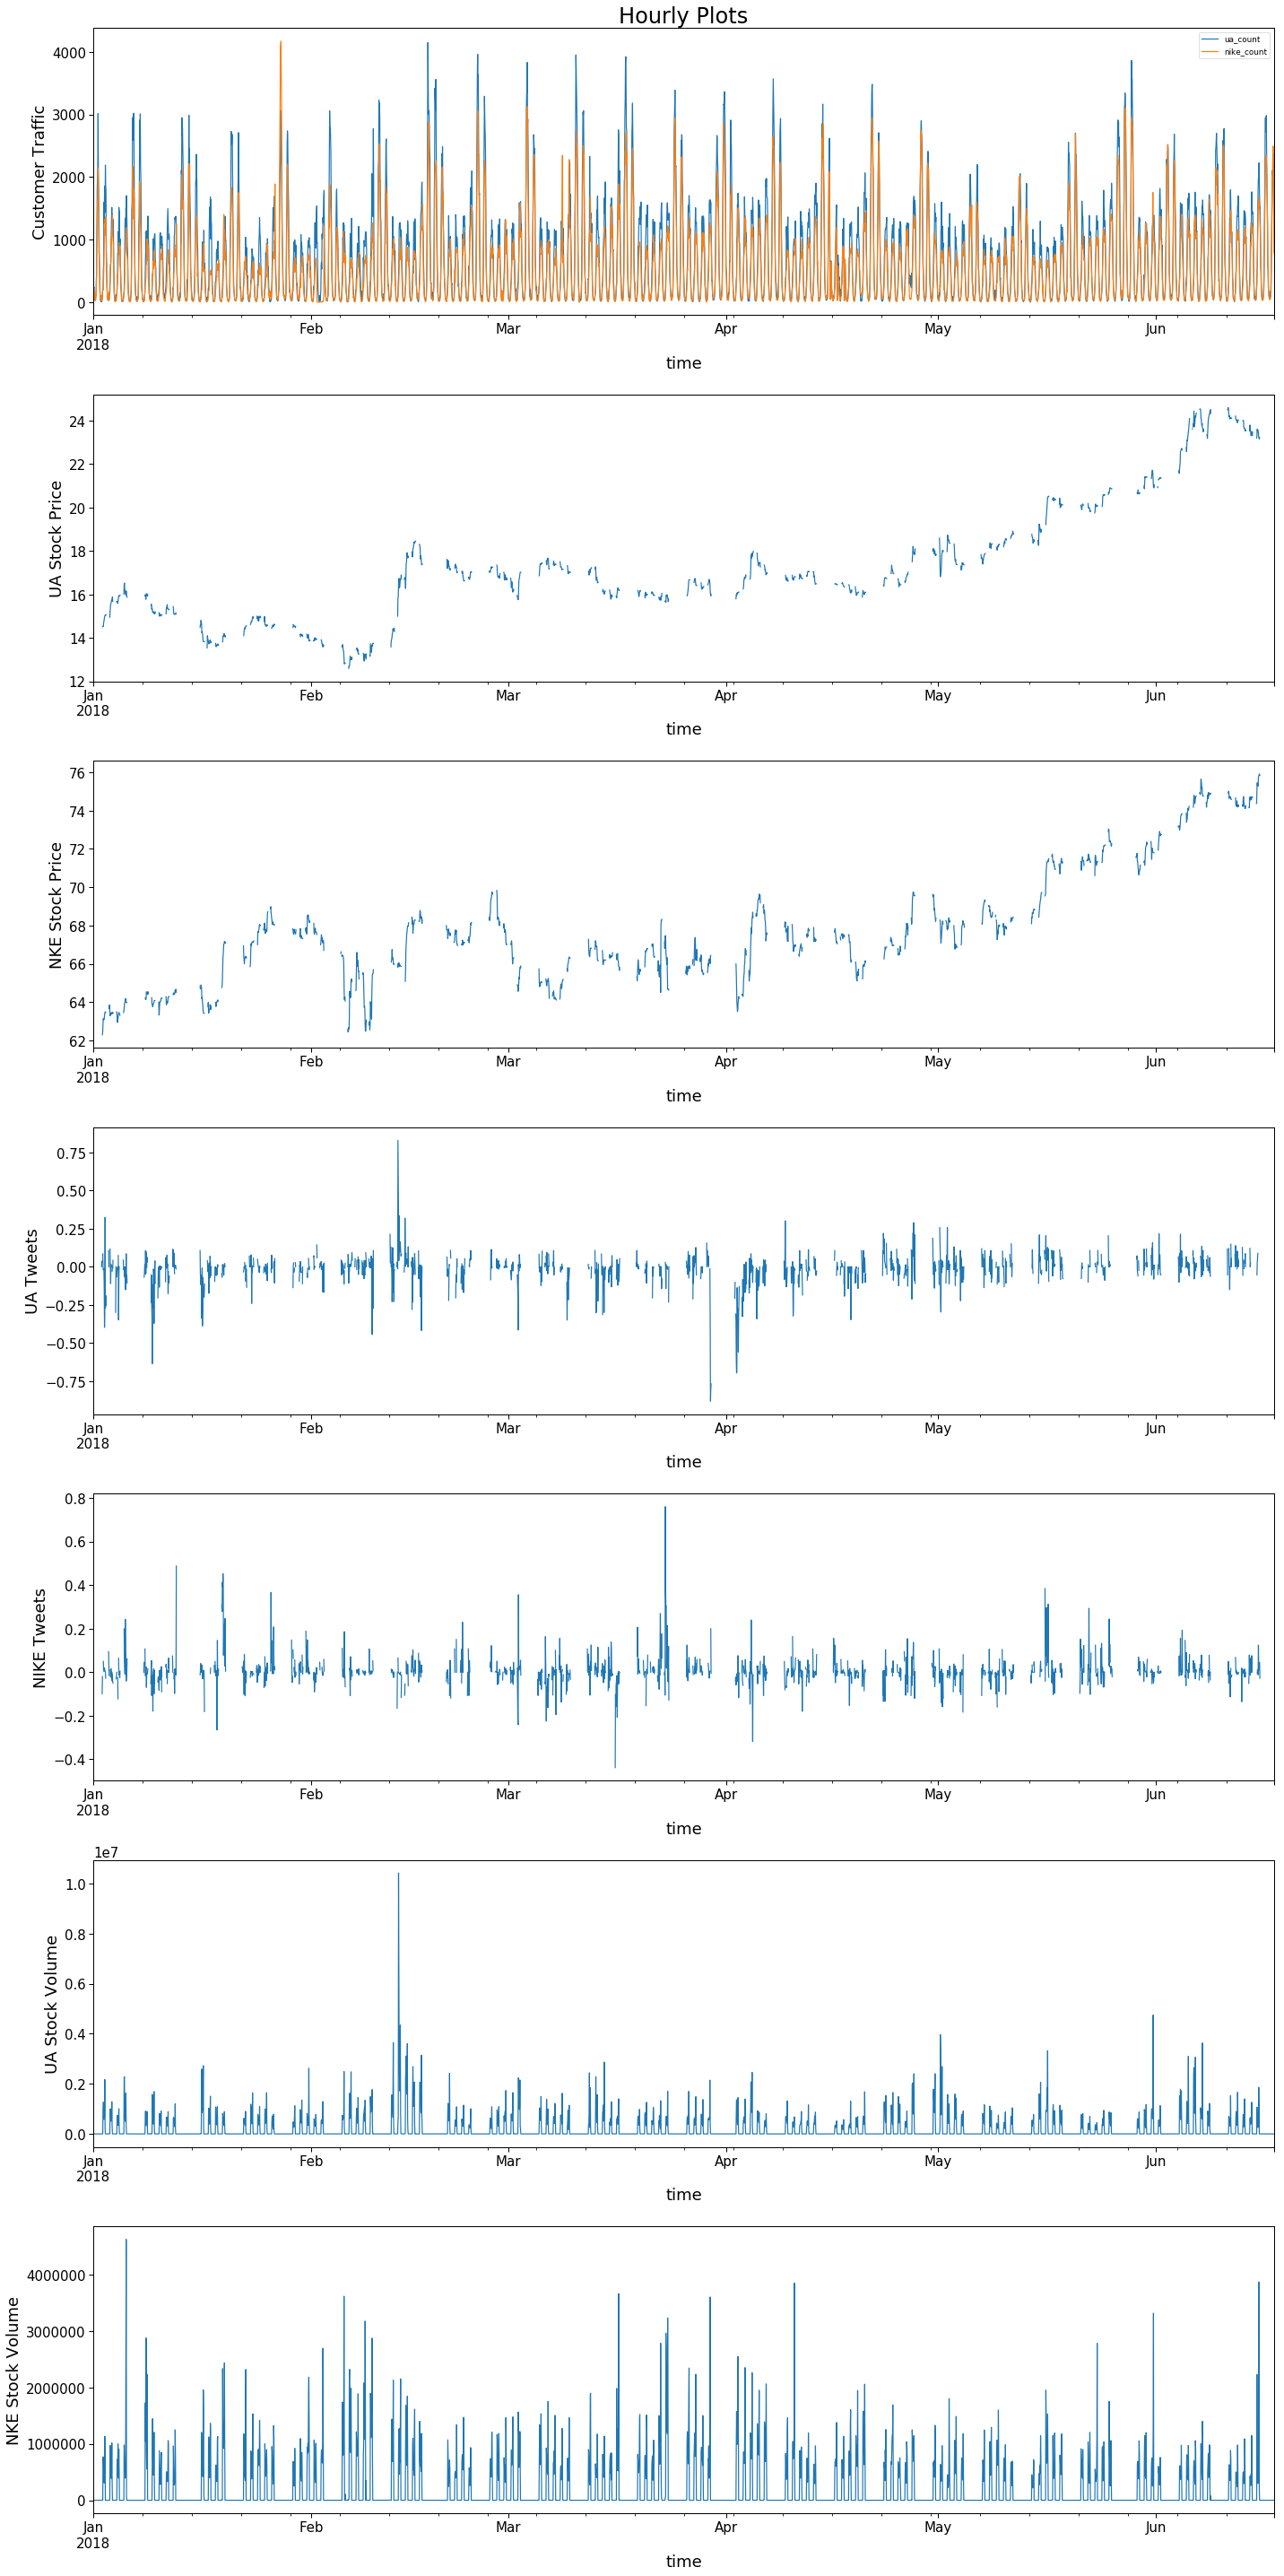

In [40]:
fig=plt.figure(figsize=(20,40))

axes1=fig.add_subplot(7,1,1)
alldata[['ua_count','nike_count']].resample('H').sum().plot(ax=axes1)

axes2=fig.add_subplot(7,1,2)
alldata['ua_price'].resample('H').mean().plot(ax=axes2)

axes3=fig.add_subplot(7,1,3)
alldata['nike_price'].resample('H').mean().plot(ax=axes3)

axes4=fig.add_subplot(7,1,4)
alldata['ua_tweet'].resample('H').mean().plot(ax=axes4)

axes5=fig.add_subplot(7,1,5)
alldata['nike_tweet'].resample('H').mean().plot(ax=axes5)

axes6=fig.add_subplot(7,1,6)
alldata['ua_stkv'].resample('H').sum().plot(ax=axes6)

axes7=fig.add_subplot(7,1,7)
alldata['nike_stkv'].resample('H').sum().plot(ax=axes7)

axes1.set_ylabel('Customer Traffic')
axes2.set_ylabel('UA Stock Price')
axes3.set_ylabel('NKE Stock Price')
axes4.set_ylabel('UA Tweets')
axes5.set_ylabel('NIKE Tweets')
axes6.set_ylabel('UA Stock Volume')
axes7.set_ylabel('NKE Stock Volume')

axes1.set_title('Hourly Plots')

plt.tight_layout()

# Part 2: Machine Learning

## 4.1 Data Understanding

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, TimeSeriesSplit, RepeatedKFold
from sklearn.feature_selection import VarianceThreshold, RFE, SelectKBest, chi2
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from mlxtend.classifier import StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

/Users/ConradKang/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_9.4.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [42]:
total = pd.read_csv('alldata.csv', parse_dates=['time'], index_col='time')
total.head()

,ua_count,nike_count,ua_price,nike_price,ua_stkv,nike_stkv,ua_tweet,nike_tweet,ua_twtcount,nike_twtcount,count_ratio,price_ratio,tweet_diff,stkv_ratio,twtcount_ratio
time,,,,,,,,,,,,,,,
2018-01-01 00:00:00,75,110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.681818,NaN,NaN,NaN,NaN
2018-01-01 00:30:00,89,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.435484,NaN,NaN,NaN,NaN
2018-01-01 01:00:00,100,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.564103,NaN,NaN,NaN,NaN
2018-01-01 01:30:00,107,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.320988,NaN,NaN,NaN,NaN
2018-01-01 02:00:00,131,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.336735,NaN,NaN,NaN,NaN


### Transform the original 30-min data to hourly data

In [43]:
count = total[['ua_count','nike_count']].resample('H').sum()
price = total[['ua_price','nike_price']].resample('H').last()
stkv = total[['ua_stkv','nike_stkv']].resample('H').sum()
tweet = total[['ua_tweet','nike_tweet']].resample('H').mean()
twtcount = total[['ua_twtcount','nike_twtcount']].resample('H').sum()
total = pd.concat([count, price, stkv, tweet, twtcount], axis = 1)
total.head()

,ua_count,nike_count,ua_price,nike_price,ua_stkv,nike_stkv,ua_tweet,nike_tweet,ua_twtcount,nike_twtcount
time,,,,,,,,,,
2018-01-01 00:00:00,164,172,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0
2018-01-01 01:00:00,207,120,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0
2018-01-01 02:00:00,243,195,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0
2018-01-01 03:00:00,114,139,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0
2018-01-01 04:00:00,90,173,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0


In [44]:
total['count_ratio'] = total.ua_count / total.nike_count
total['price_ratio'] = total.ua_price / total.nike_price
total['tweet_diff'] = total.ua_tweet - total.nike_tweet
total['stkv_ratio'] = total.ua_stkv / total.nike_stkv
total['twtcount_ratio'] = total.ua_twtcount / total.nike_twtcount
total.head()

,ua_count,nike_count,ua_price,nike_price,ua_stkv,nike_stkv,ua_tweet,nike_tweet,ua_twtcount,nike_twtcount,count_ratio,price_ratio,tweet_diff,stkv_ratio,twtcount_ratio
time,,,,,,,,,,,,,,,
2018-01-01 00:00:00,164,172,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.953488,NaN,NaN,NaN,NaN
2018-01-01 01:00:00,207,120,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,1.725000,NaN,NaN,NaN,NaN
2018-01-01 02:00:00,243,195,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,1.246154,NaN,NaN,NaN,NaN
2018-01-01 03:00:00,114,139,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.820144,NaN,NaN,NaN,NaN
2018-01-01 04:00:00,90,173,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.520231,NaN,NaN,NaN,NaN


### Plot the hourly data

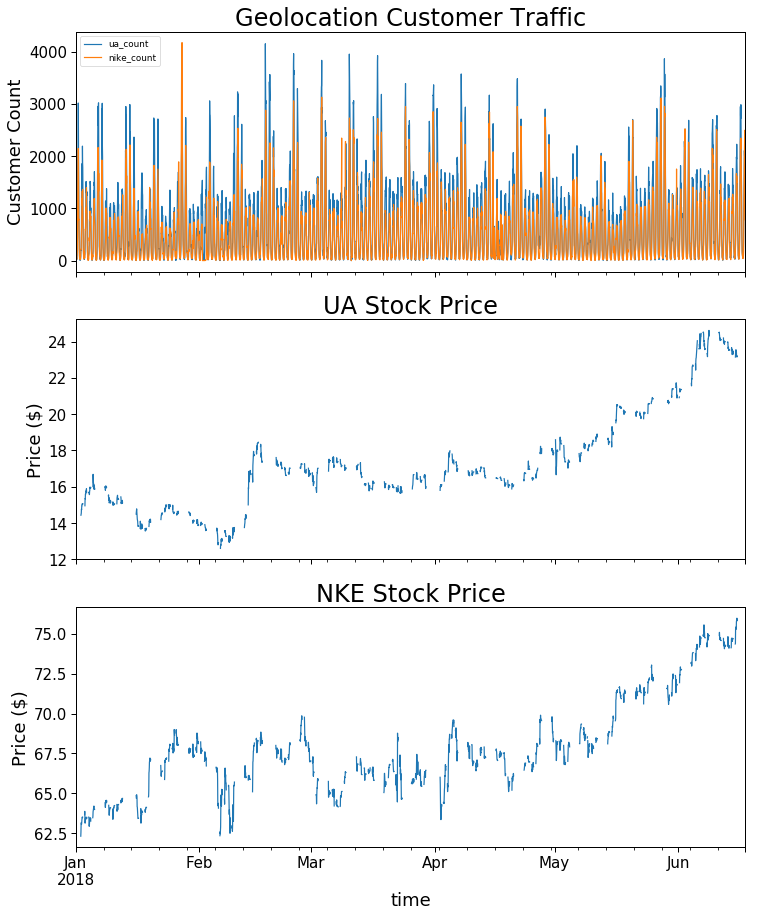

In [45]:
fig, ax = plt.subplots(3, 1, sharex = True, figsize = (12, 15))

total[['ua_count','nike_count']].plot(ax = ax[0])
total['ua_price'].plot(ax = ax[1])
total['nike_price'].plot(ax = ax[2])

ax[0].set_title('Geolocation Customer Traffic')
ax[1].set_title('UA Stock Price')
ax[2].set_title('NKE Stock Price')

ax[0].set_ylabel('Customer Count')
ax[1].set_ylabel('Price ($)')
ax[2].set_ylabel('Price ($)')

plt.show()

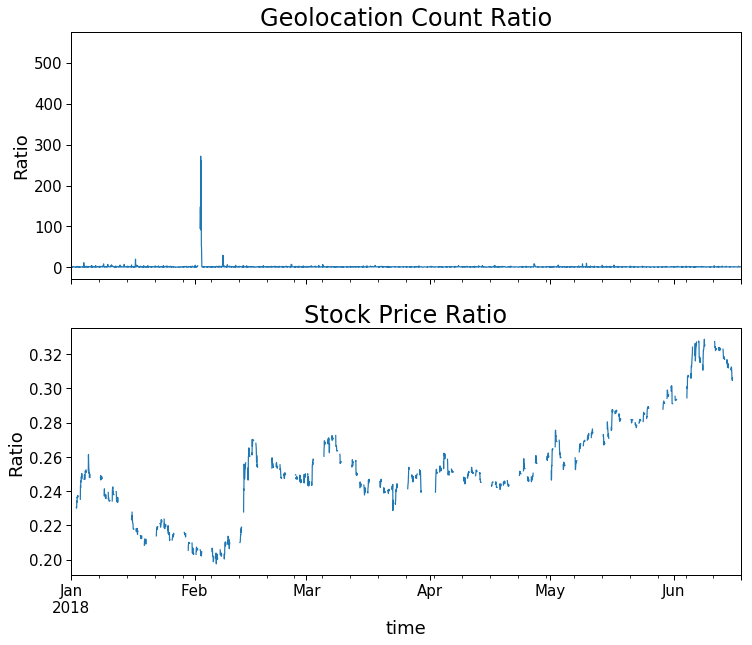

In [46]:
fig, ax = plt.subplots(2, 1, sharex = True, figsize = (12, 10))

total['count_ratio'].plot(ax = ax[0])
total['price_ratio'].plot(ax = ax[1])

ax[0].set_title('Geolocation Count Ratio')
ax[1].set_title('Stock Price Ratio')

ax[0].set_ylabel('Ratio')
ax[1].set_ylabel('Ratio')

plt.show()

## 4.2 Feature Engineering

In [47]:
# add rate of returns
return_ua = total.ua_price/total.ua_price.shift(1) - 1
return_nike = total.nike_price/total.nike_price.shift(1) - 1
return_diff = return_ua - return_nike

# create labels for classification (results for tomorrow)
value_ua = total.ua_price.shift(-1) - total.ua_price
value_nike = total.nike_price.shift(-1) - total.nike_price
value_ratio = total.price_ratio.shift(-1) - total.price_ratio

value_ua = np.where(value_ua>=0, 1, 0)
value_nike = np.where(value_nike>=0, 1, 0)
value_ratio = np.where(value_ratio>=0, 1, 0)

#### Rolling Windows

In [48]:
total = total.rolling(min_periods=1, window=3, center=False).mean() # rolling analysis

In [49]:
total.shape

(4028, 15)

In [50]:
total = total.rename(columns={
    'ua_count':'geo_ua_count',
    'nike_count':'geo_nike_count',
    'count_ratio':'geo_count_ratio'
})

# add labels and rate of returns to the dataframe
total['return_ua'] = return_ua
total['return_nike'] = return_nike
total['return_diff'] = return_diff
total['value_ua'] = value_ua
total['value_nike'] = value_nike
total['value_ratio'] = value_ratio

# forward filling
total[['ua_tweet','nike_tweet','tweet_diff']] = total[['ua_tweet','nike_tweet','tweet_diff']].fillna(method = 'ffill')

In [51]:
print(total.shape)
print(total.dropna().shape)

(4028, 21)
(1139, 21)


#### Outliers Elimination

In [52]:
def outlier_eliminate(df):
    s_mean = df.replace([np.inf, -np.inf], np.nan).dropna().mean(axis = 0)
    s_std = df.replace([np.inf, -np.inf], np.nan).dropna().std(axis = 0)
    Q1 = s_mean - 3 * s_std
    Q2 = s_mean + 3 * s_std
    return df[~((df < Q1) | (df > Q2)).any(axis = 1)]

In [53]:
total = outlier_eliminate(total)
total.shape

(3446, 21)

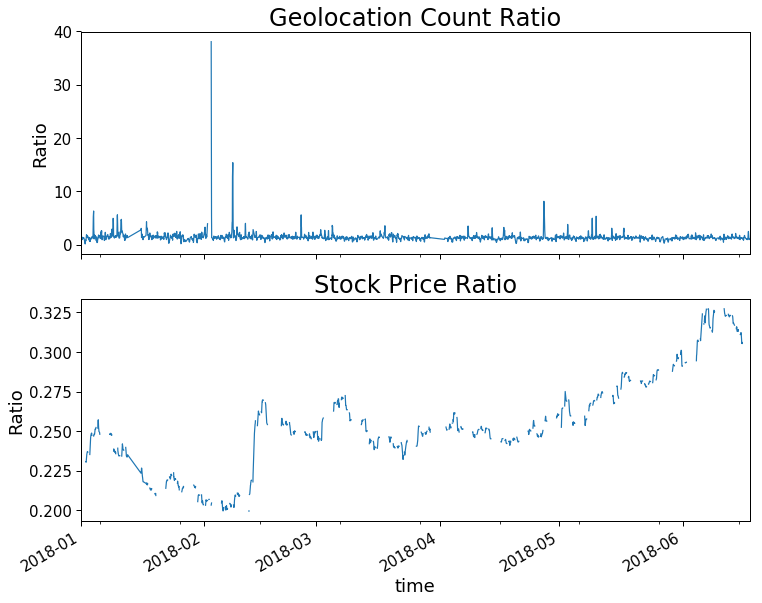

In [54]:
fig, ax = plt.subplots(2, 1, sharex = True, figsize = (12, 10))

total['geo_count_ratio'].plot(ax = ax[0])
total['price_ratio'].plot(ax = ax[1])

ax[0].set_title('Geolocation Count Ratio')
ax[1].set_title('Stock Price Ratio')

ax[0].set_ylabel('Ratio')
ax[1].set_ylabel('Ratio')

plt.show()

In [55]:
total.dropna(inplace = True)
total.head()

,geo_ua_count,geo_nike_count,ua_price,nike_price,ua_stkv,nike_stkv,ua_tweet,nike_tweet,ua_twtcount,nike_twtcount,geo_count_ratio,price_ratio,tweet_diff,stkv_ratio,twtcount_ratio,return_ua,return_nike,return_diff,value_ua,value_nike,value_ratio
time,,,,,,,,,,,,,,,,,,,,,
2018-01-02 10:00:00,296.666667,256.666667,14.491667,62.910000,7.750293e+05,512546.000000,0.021783,0.049400,4.666667,12.000000,1.101082,0.230356,-0.069350,1.542621,0.385281,0.003103,0.002063,0.001041,1,0,1
2018-01-02 11:00:00,439.666667,308.666667,14.605000,63.070000,1.171964e+06,684602.000000,-0.011000,0.030300,10.000000,12.333333,1.353246,0.231569,-0.046800,1.775936,0.822150,0.015469,-0.001742,0.017211,0,1,0
2018-01-02 12:00:00,906.000000,452.666667,14.681667,63.086667,1.012648e+06,586553.333333,-0.017100,0.021633,10.666667,13.333333,1.870221,0.232723,-0.038733,1.724140,0.836156,-0.002708,0.000476,-0.003184,1,1,1
2018-01-02 13:00:00,1164.666667,676.333333,14.816667,63.103333,7.855340e+05,433096.000000,-0.054733,0.007750,14.000000,20.000000,1.802806,0.234799,-0.023425,1.809314,0.845931,0.014936,0.002061,0.012874,1,1,0
2018-01-02 14:00:00,1535.333333,944.666667,14.876667,63.188333,6.282100e+05,436894.333333,-0.182917,0.012050,15.000000,19.000000,1.733077,0.235432,-0.220000,1.496036,1.132968,0.000000,0.001503,-0.001503,1,1,1


In [56]:
total.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1013 entries, 2018-01-02 10:00:00 to 2018-06-15 18:00:00
Data columns (total 21 columns):
geo_ua_count       1013 non-null float64
geo_nike_count     1013 non-null float64
ua_price           1013 non-null float64
nike_price         1013 non-null float64
ua_stkv            1013 non-null float64
nike_stkv          1013 non-null float64
ua_tweet           1013 non-null float64
nike_tweet         1013 non-null float64
ua_twtcount        1013 non-null float64
nike_twtcount      1013 non-null float64
geo_count_ratio    1013 non-null float64
price_ratio        1013 non-null float64
tweet_diff         1013 non-null float64
stkv_ratio         1013 non-null float64
twtcount_ratio     1013 non-null float64
return_ua          1013 non-null float64
return_nike        1013 non-null float64
return_diff        1013 non-null float64
value_ua           1013 non-null int64
value_nike         1013 non-null int64
value_ratio        1013 non-null int64
dt

In [57]:
total.describe()

,geo_ua_count,geo_nike_count,ua_price,nike_price,ua_stkv,nike_stkv,ua_tweet,nike_tweet,ua_twtcount,nike_twtcount,geo_count_ratio,price_ratio,tweet_diff,stkv_ratio,twtcount_ratio,return_ua,return_nike,return_diff,value_ua,value_nike,value_ratio
count,1013.000000,1013.000000,1013.000000,1013.000000,1.013000e+03,1.013000e+03,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1.013000e+03,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000
mean,937.231326,685.674893,17.475178,67.977167,5.715272e+05,6.339720e+05,-0.010529,0.003800,11.012833,15.265548,1.458525,0.256004,-0.013876,1.977420,8.955684e-01,0.000199,0.000131,0.000069,0.539980,0.541955,0.496545
std,414.731001,326.868420,2.782997,3.067830,3.792663e+05,3.291216e+05,0.056657,0.035315,7.746303,7.093733,1.192390,0.029954,0.069272,6.240822,6.776259e-01,0.006583,0.003350,0.006117,0.498645,0.498483,0.500235
min,18.333333,13.000000,12.710000,62.490000,6.666667e+01,6.666667e+01,-0.250683,-0.123583,0.000000,0.333333,0.605437,0.199637,-0.258233,0.035216,1.820766e-14,-0.023364,-0.012594,-0.023042,0.000000,0.000000,0.000000
25%,621.000000,421.333333,15.943333,66.080000,3.438220e+05,4.172790e+05,-0.035933,-0.011817,6.333333,10.666667,1.243585,0.242318,-0.043400,0.558078,4.727273e-01,-0.003092,-0.001343,-0.003016,0.000000,0.000000,0.000000
50%,959.333333,682.000000,16.850000,67.473333,5.212823e+05,6.020000e+05,-0.005133,0.000350,9.333333,14.000000,1.363973,0.251104,-0.008475,0.862634,7.146465e-01,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,1231.666667,899.000000,18.400433,69.066667,7.149733e+05,8.048457e+05,0.019450,0.016275,13.000000,18.000000,1.528622,0.270742,0.024967,1.310267,1.093434e+00,0.003466,0.001682,0.003119,1.000000,1.000000,1.000000
max,2140.333333,1625.000000,24.520000,75.890000,2.086922e+06,1.856924e+06,0.193533,0.153817,90.333333,50.333333,38.061177,0.327392,0.212100,69.527220,5.500000e+00,0.023442,0.013614,0.023465,1.000000,1.000000,1.000000


In [135]:
X = total.drop(total.columns[[18,19,20]], axis=1) # drop the target
y = total.value_ratio.astype('category')

In [136]:
print(X.shape)
print(y.shape)

(1013, 18)
(1013,)


## 4.3 Exploratory Data Analysis

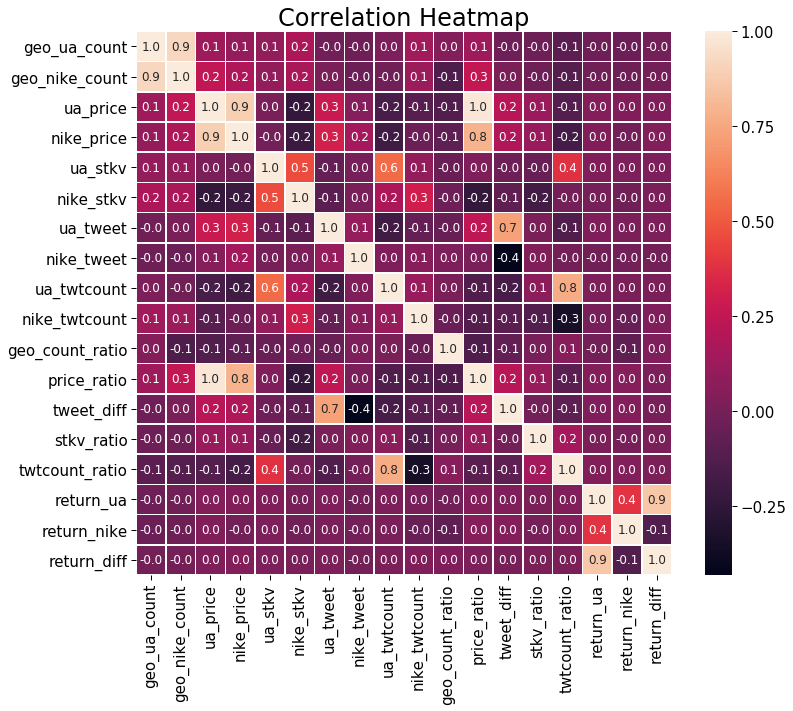

In [141]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f', ax=ax)
plt.title('Correlation Heatmap', size = 24)
plt.show()
fig.savefig('ch.png')

Number of ups:  510
Number of downs :  503


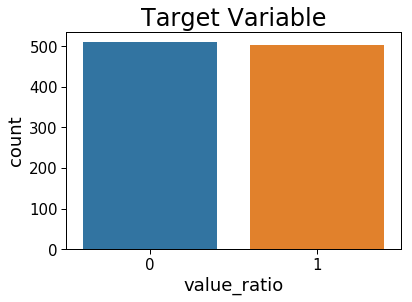

In [61]:
# No need for stratified sampling; know the random guessing accuracy
ax = sns.countplot(y, label="Count") 
ups, downs = y.value_counts()
plt.title('Target Variable')
print('Number of ups: ', ups)
print('Number of downs : ', downs)

## 4.4 Feature Selection

In [62]:
out_feature = int(0.5 * X.shape[1])
out_feature

9

### 4.4.1 Variance Filtering

In [63]:
threshold = 0.8 # frequently used threshold
vt = VarianceThreshold().fit(X)

feat_var_threshold = X.columns[vt.variances_ > threshold * (1 - threshold)]
feat_var_threshold

Index(['geo_ua_count', 'geo_nike_count', 'ua_price', 'nike_price', 'ua_stkv',
       'nike_stkv', 'ua_twtcount', 'nike_twtcount', 'geo_count_ratio',
       'stkv_ratio', 'twtcount_ratio'],
      dtype='object')

In [64]:
len(feat_var_threshold)

11

### 4.4.2 Importance Ranking

In [65]:
modelr = RandomForestClassifier(random_state = 42)
modelr.fit(X, y)

feature_impr = pd.DataFrame(modelr.feature_importances_, index=X.columns, columns=["importance"])
feat_imp_rf = feature_impr.sort_values("importance", ascending=False).head(out_feature).index
feat_imp_rf

Index(['ua_stkv', 'stkv_ratio', 'nike_stkv', 'nike_tweet', 'return_nike',
       'return_diff', 'twtcount_ratio', 'geo_ua_count', 'return_ua'],
      dtype='object')

In [66]:
modela = AdaBoostClassifier(random_state = 42)
modela.fit(X, y)

feature_impa = pd.DataFrame(modela.feature_importances_, index=X.columns, columns=["importance"])
feat_imp_ada = feature_impa.sort_values("importance", ascending=False).head(out_feature).index
feat_imp_ada

Index(['ua_tweet', 'geo_ua_count', 'stkv_ratio', 'nike_tweet', 'ua_twtcount',
       'geo_count_ratio', 'return_ua', 'tweet_diff', 'price_ratio'],
      dtype='object')

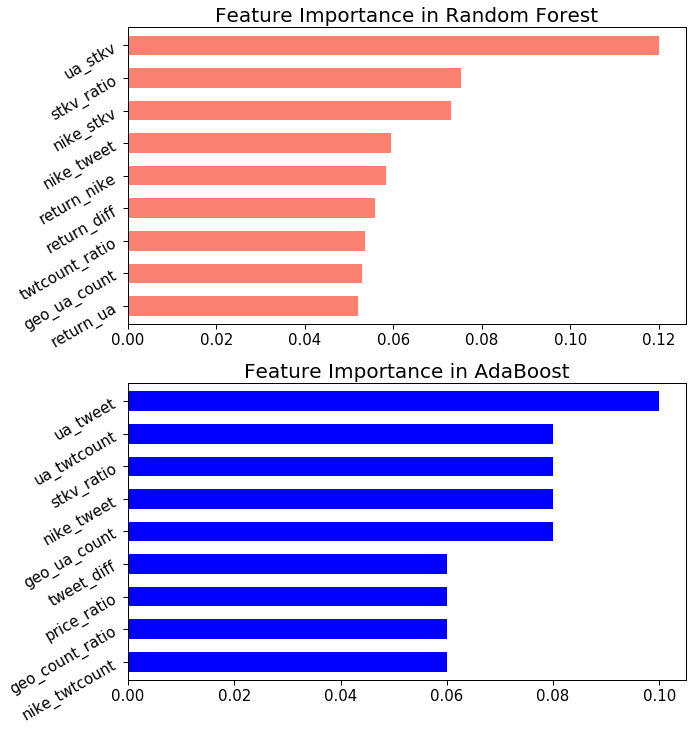

In [140]:
fig, ax = plt.subplots(2, 1, figsize=(10,12))

pd.Series(modelr.feature_importances_, X.columns).sort_values(ascending=True).tail(out_feature).plot.barh(width=0.6, ax=ax[0], color='salmon')
ax[0].set_title('Feature Importance in Random Forest', fontsize=20)
ax[0].tick_params(axis='y', rotation=30)

pd.Series(modela.feature_importances_, X.columns).sort_values(ascending=True).tail(out_feature).plot.barh(width=0.6, ax=ax[1], color='blue')
ax[1].set_title('Feature Importance in AdaBoost', fontsize=20)
ax[1].tick_params(axis='y', rotation=30)

### 4.4.3 SelectKBest with Chi-square

In [68]:
X_minmax = MinMaxScaler().fit_transform(X)
X_scored = SelectKBest(score_func=chi2, k='all').fit(X_minmax, y)
feature_scoring = pd.DataFrame({
        'feature': X.columns,
        'score': X_scored.scores_
    })

feat_scored = feature_scoring.sort_values('score', ascending=False).head(out_feature)['feature'].values
feat_scored

array(['ua_stkv', 'nike_stkv', 'stkv_ratio', 'nike_twtcount',
       'return_diff', 'return_ua', 'twtcount_ratio', 'nike_price',
       'geo_count_ratio'], dtype=object)

### 4.4.4 Recursive Feature Elimination

In [69]:
rfe = RFE(LogisticRegression(), out_feature)
rfe.fit(X, y)

feature_rfe_scoring = pd.DataFrame({
        'feature': X.columns,
        'score': rfe.ranking_
    })

feat_rfe = feature_rfe_scoring[feature_rfe_scoring['score'] == 1]['feature'].values
feat_rfe

array(['geo_nike_count', 'ua_price', 'nike_price', 'ua_twtcount',
       'nike_twtcount', 'geo_count_ratio', 'price_ratio', 'stkv_ratio',
       'twtcount_ratio'], dtype=object)

### 4.4.5 Put All Things Together

In [70]:
features = np.hstack([
    feat_var_threshold,
    feat_imp_rf, 
    feat_imp_ada,
    feat_scored,
    feat_rfe
    ])

fc = pd.DataFrame(pd.Series(features).value_counts(), 
                  columns = ['count']).reset_index().rename(columns = {'index':'feature'})
fc

,feature,count
0,stkv_ratio,5
1,twtcount_ratio,4
2,geo_count_ratio,4
3,return_ua,3
4,nike_stkv,3
5,nike_price,3
6,ua_twtcount,3
7,geo_ua_count,3
8,nike_twtcount,3
9,ua_stkv,3


In [71]:
features = fc.feature[fc['count'] > 2].tolist()

print('Final features set:\n')
for f in features:
    print("\t-{}".format(f))

Final features set:

	-stkv_ratio
	-twtcount_ratio
	-geo_count_ratio
	-return_ua
	-nike_stkv
	-nike_price
	-ua_twtcount
	-geo_ua_count
	-nike_twtcount
	-ua_stkv


In [72]:
print(len(features))
X = X.ix[:, features]

10


## 4.5 Modeling

### 4.5.1 Preparation

In [73]:
random_state = 42
processors = -1
scoring = 'accuracy'
scoring1 = 'roc_auc'
scoring2 = 'f1'
kfold = TimeSeriesSplit(n_splits=10)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = random_state)
print('Training set features shape: {}'.format(X_train.shape))
print('Training set target shape: {}'. format((y_train).shape))

Training set features shape: (709, 10)
Training set target shape: (709,)


In [75]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 4.5.2 Simple Modeling

#### Cross Validation

In [76]:
classifiers = [
    SVC(random_state = random_state),
    DecisionTreeClassifier(random_state = random_state),
    RandomForestClassifier(random_state = random_state),
    KNeighborsClassifier(),
    LogisticRegression(random_state = random_state),
    LDA(), 
    QDA(), 
    GaussianNB(), 
    MLPClassifier(random_state = random_state),
    AdaBoostClassifier(random_state = random_state),
    GradientBoostingClassifier(random_state = random_state),
    XGBClassifier(objective = 'binary:logistic', seed = random_state)
]

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y_train, scoring = "accuracy", cv = kfold))

cv_means = []
cv_std = []

for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cla_names = [
    "Support Vector Machine","Decision Tree","Random Forest","KNeighbors",
    "Logistic Regression","Linear Discriminant Analysis",
    "Quadratic Discriminant Analysis","Naive Bayes",
    "Neural Network","AdaBoosting","Gradient Boosting", "XGBoost"
]
    
cv_res = pd.DataFrame({"Method": cla_names,
                       "CrossValMeans": cv_means,
                       "CrossValerrors": cv_std})

cv_res = cv_res.sort_values(['CrossValMeans'],ascending=False).reset_index(drop=True)
cv_res

,Method,CrossValMeans,CrossValerrors
0,Logistic Regression,0.612500,0.058380
1,XGBoost,0.607812,0.058651
2,Linear Discriminant Analysis,0.606250,0.054486
3,Neural Network,0.604688,0.049435
4,Gradient Boosting,0.601562,0.062206
5,Support Vector Machine,0.587500,0.084201
6,Random Forest,0.582812,0.084447
7,KNeighbors,0.557813,0.043103
8,Quadratic Discriminant Analysis,0.556250,0.064877
9,AdaBoosting,0.556250,0.061793


In [77]:
pl = pd.DataFrame(data = cv_results, index = cla_names)
pl = pl.T
pl.head()

,Support Vector Machine,Decision Tree,Random Forest,KNeighbors,Logistic Regression,Linear Discriminant Analysis,Quadratic Discriminant Analysis,Naive Bayes,Neural Network,AdaBoosting,Gradient Boosting,XGBoost
0,0.359375,0.328125,0.406250,0.484375,0.562500,0.578125,0.609375,0.593750,0.546875,0.421875,0.468750,0.515625
1,0.546875,0.593750,0.562500,0.500000,0.640625,0.578125,0.531250,0.515625,0.500000,0.562500,0.546875,0.625000
2,0.593750,0.593750,0.718750,0.609375,0.515625,0.531250,0.484375,0.484375,0.593750,0.578125,0.625000,0.609375
3,0.656250,0.546875,0.671875,0.609375,0.578125,0.578125,0.625000,0.593750,0.671875,0.515625,0.593750,0.578125
4,0.609375,0.578125,0.562500,0.593750,0.640625,0.625000,0.515625,0.531250,0.625000,0.531250,0.546875,0.593750


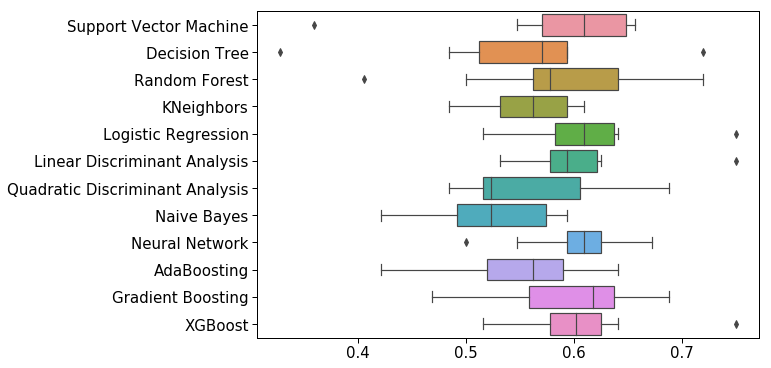

In [142]:
# Barplot
plt.figure(figsize = (9,6))
sns.boxplot(data = pl, orient = 'h')

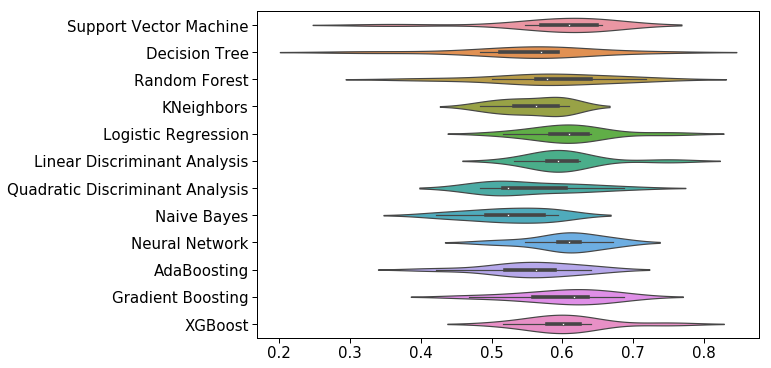

In [79]:
# ViolinPlot
plt.figure(figsize = (9,6))
sns.violinplot(data = pl, orient = 'h')

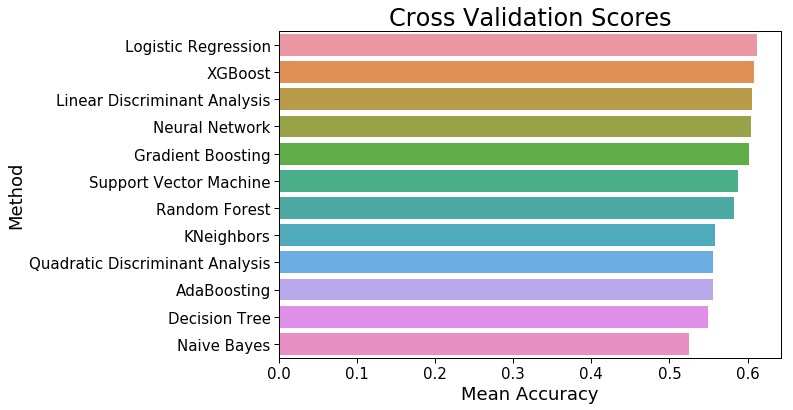

In [80]:
plt.figure(figsize = (9,6))
sns.barplot("CrossValMeans", "Method", data = cv_res)
plt.xlabel("Mean Accuracy")
plt.title("Cross Validation Scores")
plt.show()

#### Using Testing Set

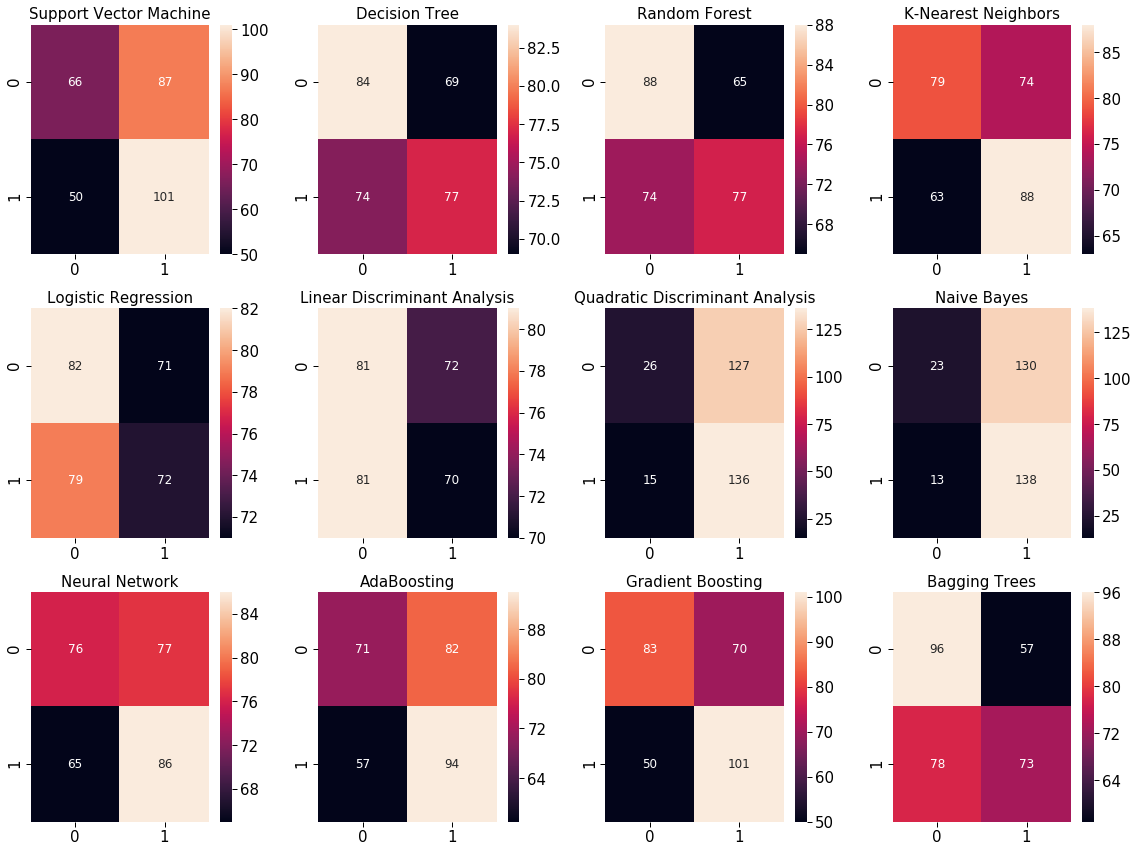

In [81]:
# Confusion Matrix
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":15,"axes.labelsize":15,"xtick.labelsize":15,"ytick.labelsize":15})

f, ax = plt.subplots(3,4,figsize=(16,12))

acc=[]

model=SVC(random_state = random_state)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[0,0],annot=True,fmt='d')
ax[0,0].set_title('Support Vector Machine')

cart=DecisionTreeClassifier(random_state = random_state)
model=cart
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[0,1],annot=True,fmt='d')
ax[0,1].set_title('Decision Tree')

model=RandomForestClassifier(random_state = random_state)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[0,2],annot=True,fmt='d')
ax[0,2].set_title('Random Forest')

model=KNeighborsClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[0,3],annot=True,fmt='d')
ax[0,3].set_title('K-Nearest Neighbors')

model=LogisticRegression(random_state = random_state)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[1,0],annot=True,fmt='d')
ax[1,0].set_title('Logistic Regression')

model=LDA()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[1,1],annot=True,fmt='d')
ax[1,1].set_title('Linear Discriminant Analysis')

model=QDA()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[1,2],annot=True,fmt='d')
ax[1,2].set_title('Quadratic Discriminant Analysis')

model=GaussianNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[1,3],annot=True,fmt='d')
ax[1,3].set_title('Naive Bayes')

model=MLPClassifier(random_state = random_state)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[2,0],annot=True,fmt='d')
ax[2,0].set_title('Neural Network')

model=AdaBoostClassifier(random_state = random_state)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[2,1],annot=True,fmt='d')
ax[2,1].set_title('AdaBoosting')

model=GradientBoostingClassifier(random_state = random_state)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[2,2],annot=True,fmt='d')
ax[2,2].set_title('Gradient Boosting')

model=BaggingClassifier(random_state = random_state)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[2,3],annot=True,fmt='d')
ax[2,3].set_title('Bagging Trees')

plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.tight_layout()
plt.show()

In [82]:
accdf = pd.DataFrame({"Accuracy":acc,
                      "Algorithm":["SVM","DT","RF","KNN",
                                   "LR","LDA",
                                   "QDA","NB","NN",
                                   "Ada","GBM","Bagging"]})

accdf = accdf.sort_values(['Accuracy'],ascending=False).reset_index(drop=True)
accdf

,Accuracy,Algorithm
0,0.605263,GBM
1,0.555921,Bagging
2,0.549342,SVM
3,0.549342,KNN
4,0.542763,RF
5,0.542763,Ada
6,0.532895,QDA
7,0.532895,NN
8,0.529605,DT
9,0.529605,NB


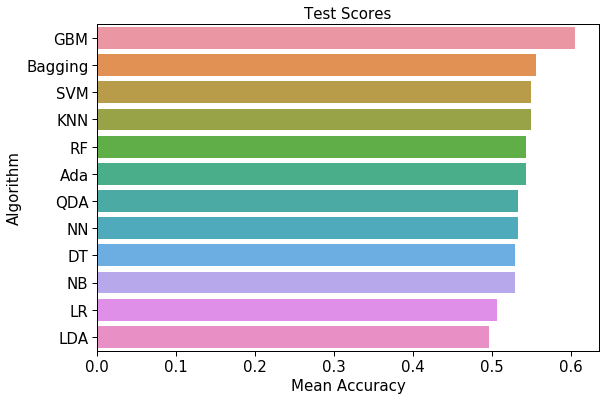

In [83]:
plt.figure(figsize = (9,6))
sns.barplot("Accuracy", "Algorithm", data = accdf)
plt.xlabel("Mean Accuracy")
plt.title("Test Scores")
plt.show()

### LightGBM with Early Stopping & GridSearch

In [84]:
lgb_mod = LGBMClassifier(objective = 'binary', num_leaves = 30, learning_rate = 0.05, n_estimators = 20)
lgb_mod.fit(X_train, y_train, eval_set = [(X_test, y_test)], eval_metric='l1', early_stopping_rounds = 5, verbose = False)
y_pred = lgb_mod.predict(X_test, num_iteration = lgb_mod.best_iteration_)
print('Accuracy: %.3f'%(accuracy_score(y_test, y_pred)))

Accuracy: 0.612


In [85]:
estimator = LGBMClassifier(objective = 'binary', 
                           scoring = scoring, 
                           n_jobs = processors,
                           seed = random_state)

param_grid = {
    'num_leaves': [20, 30, 40],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [20, 40, 60]
}

lgb_grid = GridSearchCV(estimator, param_grid)

lgb_grid.fit(X_train, y_train)

print("LGB:")
print("="*30)
print(lgb_grid.best_score_)
print(lgb_grid.best_params_)

LGB:
0.6304654442877292
{'learning_rate': 0.01, 'n_estimators': 40, 'num_leaves': 20}


### Deep Learning (FNN & LSTM)

In [86]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = random_state)
print('Training set features shape: {}'.format(X_train.shape))
print('Training set target shape: {}'. format((y_train).shape))

Training set features shape: (709, 10)
Training set target shape: (709,)


In [88]:
X_tr1 = torch.tensor(X_train.values).float()
y_tr1 = torch.tensor(y_train.values).long()
X_ts1 = torch.tensor(X_test.values).float()
y_ts1 = torch.tensor(y_test.values).long()

In [89]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net,self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self,x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x
    
                 
    def predict(self,x):
        pred = F.softmax(self.forward(x))
        ans = []
        for t in pred:
            if t[0] > t[1]:
                ans.append(0)
            else:
                ans.append(1)
        return torch.tensor(ans)

In [90]:
model = Net(10, 20, 2)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [91]:
epochs = 100

# Train the model
for epoch in range(epochs):
    # Forward pass
    outputs = model(X_tr1)
    loss = criterion(outputs, y_tr1)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print ('Epoch [{}/{}], Loss: {:.3f}'.format(epoch + 1, epochs, loss.item()))

Epoch [10/100], Loss: 1486.744
Epoch [20/100], Loss: 2675.070
Epoch [30/100], Loss: 1328.235
Epoch [40/100], Loss: 1015.902
Epoch [50/100], Loss: 541.773
Epoch [60/100], Loss: 294.314
Epoch [70/100], Loss: 893.443
Epoch [80/100], Loss: 183.359
Epoch [90/100], Loss: 1141.366
Epoch [100/100], Loss: 172.504


In [92]:
# loss is pretty big, simple FNN is not suitable
print("Accuracy: %.3f"%(accuracy_score(model.predict(X_ts1), y_ts1)))

Accuracy: 0.510


In [93]:
X_tr2 = torch.from_numpy(X_train.values.reshape(-1, 1, 10)).float()
y_tr2 = torch.from_numpy(np.array(y_train)).long()
X_ts2 = torch.from_numpy(X_test.values.reshape(-1, 1, 10)).float()
y_ts2 = torch.from_numpy(np.array(y_test)).long()

In [94]:
# Recurrent neural network (many-to-one)
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        # Set initial hidden and cell states 
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size) 
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        
        # Forward propagate LSTM
        x, _ = self.lstm(x, (h0, c0))  # out: tensor of shape (batch_size, seq_length, hidden_size)
        
        # Decode the hidden state of the last time step
        x = self.fc(x[:, -1, :])
        return x
    
    def predict(self,x):
        pred = F.softmax(self.forward(x))
        ans = []
        for t in pred:
            if t[0] > t[1]:
                ans.append(0)
            else:
                ans.append(1)
        return torch.tensor(ans)

In [95]:
model = RNN(10, 20, 3, 2)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [96]:
epochs = 100

# Train the model
for epoch in range(epochs):
    # Forward pass
    outputs = model(X_tr2)
    loss = criterion(outputs, y_tr2)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print ('Epoch [{}/{}], Loss: {:.3f}'.format(epoch + 1, epochs, loss.item()))

Epoch [10/100], Loss: 0.693
Epoch [20/100], Loss: 0.690
Epoch [30/100], Loss: 0.693
Epoch [40/100], Loss: 0.684
Epoch [50/100], Loss: 0.685
Epoch [60/100], Loss: 0.687
Epoch [70/100], Loss: 0.684
Epoch [80/100], Loss: 0.684
Epoch [90/100], Loss: 0.684
Epoch [100/100], Loss: 0.683


In [97]:
# even the loss is very small, it's still not a good acc: overfitting due to small dataset
print("Accuracy: %.3f"%(accuracy_score(model.predict(X_ts2), y_ts2)))

Accuracy: 0.516


In [98]:
e_list = []

l_list = []

a_list = []

# Train the model
for epoch in range(epochs):
    # Forward pass
    outputs = model(X_tr2)
    loss = criterion(outputs, y_tr2)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    e_list.append(epoch)
    l_list.append(loss.item())
    a_list.append(accuracy_score(model.predict(X_ts2), y_ts2))

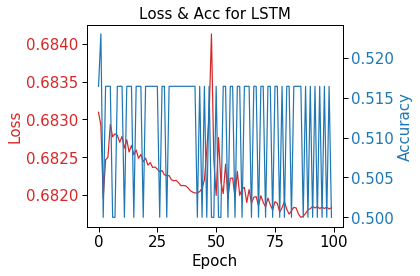

In [99]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color=color)
ax1.plot(e_list, l_list, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Accuracy', color=color)  # we already handled the x-label with ax1
ax2.plot(e_list, a_list, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Loss & Acc for LSTM")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [100]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 5. Using 3 Performance Evaluation Methods

### 5.1 For Accuracy as Scoring Metric

#### Hyperparameter Tuning

In [101]:
lr_grid = GridSearchCV(
    estimator = LogisticRegression(random_state=random_state),
    param_grid = {
        'penalty': ['l1', 'l2'],
        'C': [0.001,0.01, 0.1]
    }, 
    cv = kfold, 
    scoring = scoring, 
    n_jobs = processors)

lr_grid.fit(X_train, y_train)

print("Logistic:")
print("="*30)
print(lr_grid.best_score_)
print(lr_grid.best_params_)

Logistic:
0.6140625
{'C': 0.001, 'penalty': 'l2'}


In [102]:
lda_grid = GridSearchCV(
    estimator = LDA(),
    param_grid = {
        'solver': ['svd', 'lsqr'],
        'n_components': [None, 2, 5]
    }, 
    cv = kfold, 
    scoring = scoring, 
    n_jobs = processors)

lda_grid.fit(X_train, y_train)

print("Linear Discriminant Analysis:")
print("="*30)
print(lda_grid.best_score_)
print(lda_grid.best_params_)

Linear Discriminant Analysis:
0.60625
{'n_components': None, 'solver': 'svd'}


In [103]:
qda_grid = GridSearchCV(
    estimator = QDA(),
    param_grid = {
        'priors': [None, 0, 1],
        'reg_param': [0.2, 0.3, 0.4]
    }, 
    cv = kfold, 
    scoring = scoring, 
    n_jobs = processors)

qda_grid.fit(X_train, y_train)

print("Quadratic Discriminant Analysis:")
print("="*30)
print(qda_grid.best_score_)
print(qda_grid.best_params_)

Quadratic Discriminant Analysis:
0.5984375
{'priors': None, 'reg_param': 0.4}


In [104]:
bag_grid = RandomizedSearchCV(
    estimator = BaggingClassifier(base_estimator=cart, warm_start=True, random_state=random_state),
    param_distributions = {
        'n_estimators': [200, 500, 1000],
        'max_samples': [0.1, 0.3, 0.5],
        'max_features': [0.3, 0.5, 0.7]
    }, 
    cv = kfold, 
    scoring = scoring, 
    n_jobs = processors)

bag_grid.fit(X_train, y_train)

print("Bagging Trees:")
print("="*30)
print(bag_grid.best_score_)
print(bag_grid.best_params_)

Bagging Trees:
0.5984375
{'n_estimators': 200, 'max_samples': 0.5, 'max_features': 0.7}


In [105]:
rf_grid = RandomizedSearchCV(
    estimator = RandomForestClassifier(warm_start=True, random_state=random_state),
    param_distributions = {
        'n_estimators': [50, 100, 200],
        'criterion': ['gini', 'entropy'],
        'max_depth': [6, 8, 10],
        'max_features': ['sqrt', 'log2']
    }, 
    cv = kfold, 
    scoring = scoring, 
    n_jobs = processors)

rf_grid.fit(X_train, y_train)

print("Random Forest:")
print("="*30)
print(rf_grid.best_score_)
print(rf_grid.best_params_)

Random Forest:
0.621875
{'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': 8, 'criterion': 'entropy'}


In [106]:
ada_grid = RandomizedSearchCV(
    estimator = AdaBoostClassifier(random_state=random_state),
    param_distributions = {
        'algorithm': ['SAMME', 'SAMME.R'],
        'n_estimators': [200, 500, 1000],
        'learning_rate': [0.001, 0.01, 0.1]
    }, 
    cv = kfold, 
    scoring = scoring, 
    n_jobs = processors)

ada_grid.fit(X_train, y_train)

print("Adaboost:")
print("="*30)
print(ada_grid.best_score_)
print(ada_grid.best_params_)

Adaboost:
0.6140625
{'n_estimators': 1000, 'learning_rate': 0.01, 'algorithm': 'SAMME.R'}


In [107]:
gbm_grid = RandomizedSearchCV(
    estimator = GradientBoostingClassifier(warm_start=True, random_state=random_state),
    param_distributions = {
        'n_estimators': [100, 200, 500],
        'max_depth': [8, 10, 12],
        'max_features': [0.1, 0.3, 0.5],
        'learning_rate': [0.01, 0.1, 1]
    }, 
    cv = kfold, 
    scoring = scoring, 
    n_jobs = processors)

gbm_grid.fit(X_train, y_train)

print("Gradiant Boosting Machine:")
print("="*30)
print(gbm_grid.best_score_)
print(gbm_grid.best_params_)

Gradiant Boosting Machine:
0.596875
{'n_estimators': 100, 'max_features': 0.5, 'max_depth': 12, 'learning_rate': 0.1}


In [108]:
xgb_grid = RandomizedSearchCV(
    estimator = XGBClassifier(objective = 'binary:logistic', seed = random_state), 
    param_distributions = {
    'learning_rate': [0.01, 0.1, 1], 
    'n_estimators': [50, 100, 200],
    'subsample': [0.1, 0.3, 0.5]
}, 
    n_iter = 10, 
    cv = kfold, 
    scoring = scoring, 
    n_jobs = processors,
    verbose = False) 

xgb_grid.fit(X_train, y_train)

print("XGBoost:")
print("="*30)
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

XGBoost:
0.60625
{'subsample': 0.3, 'n_estimators': 50, 'learning_rate': 0.01}


#### StackingClassifier

In [109]:
# create sub models according to the best models above
clf1 = lr_grid.best_estimator_
clf2 = lda_grid.best_estimator_
clf3 = qda_grid.best_estimator_
clf4 = bag_grid.best_estimator_
clf5 = rf_grid.best_estimator_
clf6 = ada_grid.best_estimator_
clf7 = gbm_grid.best_estimator_
clf8 = xgb_grid.best_estimator_

lr = LogisticRegression()

sclf = StackingClassifier(classifiers = [clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8], 
                          use_probas = True, average_probas = False,
                          meta_classifier = lr)

print('10-fold cross validation:\n')

for clf, label in zip([clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8, sclf], 
                      ['LR', 
                       'LDA', 
                       'QDA',
                       'Bagging Trees',
                       'Random Forest',
                       'Adaboost',
                       'GBM',
                       'XGBoost',
                       'Stacking']):

    scores = cross_val_score(clf, X_train, y_train, cv = kfold, scoring = scoring)
    print("ACC: %0.3f (+/- %0.3f) [%s]" 
          % (scores.mean(), scores.std(), label))

10-fold cross validation:

ACC: 0.614 (+/- 0.052) [LR]
ACC: 0.606 (+/- 0.054) [LDA]
ACC: 0.598 (+/- 0.067) [QDA]
ACC: 0.598 (+/- 0.071) [Bagging Trees]
ACC: 0.622 (+/- 0.060) [Random Forest]
ACC: 0.614 (+/- 0.083) [Adaboost]
ACC: 0.597 (+/- 0.063) [GBM]
ACC: 0.606 (+/- 0.056) [XGBoost]
ACC: 0.592 (+/- 0.066) [Stacking]


#### VotingClassifier

In [110]:
# Create sub models
estimators = [
    ('lr',clf1),
    ('lda',clf2),
    ('qda',clf3),
    ('bag',clf4),
    ('rf',clf5),
    ('ada',clf6),
    ('gbm',clf7),
    ('xgb',clf8)
]

# Create the ensemble model
ensemble = VotingClassifier(estimators, voting = 'soft')
results = cross_val_score(ensemble, X_train, y_train, cv = kfold, scoring = scoring, n_jobs = processors)

print("Ensemble:")
print("="*30)
print("({0:.3f}) +/- ({1:.3f})".format(results.mean(), results.std()))

Ensemble:
(0.622) +/- (0.052)


### 5.2 For ROC/AUC as Scoring Metric

#### Hyperparameter Tuning

In [111]:
lr_grid1 = GridSearchCV(
    estimator = LogisticRegression(random_state=random_state),
    param_grid = {
        'penalty': ['l1', 'l2'],
        'C': [0.0001,0.001,0.01]
    }, 
    cv = kfold, 
    scoring = scoring1, 
    n_jobs = processors,
)

lr_grid1.fit(X_train, y_train)

print("Logistic:")
print("="*30)
print(lr_grid1.best_score_)
print(lr_grid1.best_params_)

Logistic:
0.6715483482867992
{'C': 0.01, 'penalty': 'l2'}


In [112]:
lda_grid1 = GridSearchCV(
    estimator = LDA(),
    param_grid = {
        'solver': ['svd', 'lsqr'],
        'n_components': [None, 2, 5]
    }, 
    cv = kfold, 
    scoring = scoring1, 
    n_jobs = processors)

lda_grid1.fit(X_train, y_train)

print("Linear Discriminant Analysis:")
print("="*30)
print(lda_grid1.best_score_)
print(lda_grid1.best_params_)

Linear Discriminant Analysis:
0.6631122445330524
{'n_components': None, 'solver': 'svd'}


In [113]:
lgb_grid1 = GridSearchCV(
    estimator = LGBMClassifier(objective = 'binary'),
    param_grid = {
        'num_leaves': [20, 30, 40],
        'learning_rate': [0.01, 0.05, 0.1],
        'n_estimators': [20, 40, 60]
    },
    cv = kfold,
    scoring = scoring1, 
    n_jobs = processors)

lgb_grid1.fit(X_train, y_train)

print("LGB:")
print("="*30)
print(lgb_grid1.best_score_)
print(lgb_grid1.best_params_)

LGB:
0.6695544941640935
{'learning_rate': 0.01, 'n_estimators': 60, 'num_leaves': 30}


In [114]:
bag_grid1 = RandomizedSearchCV(
    estimator = BaggingClassifier(base_estimator=cart, warm_start=True, random_state=random_state),
    param_distributions = {
        'n_estimators': [100, 200, 500],
        'max_samples': [0.1, 0.3, 0.5],
        'max_features': [0.3, 0.5, 0.7]
    }, 
    cv = kfold, 
    scoring = scoring1, 
    n_jobs = processors)

bag_grid1.fit(X_train, y_train)

print("Bagging Trees:")
print("="*30)
print(bag_grid1.best_score_)
print(bag_grid1.best_params_)

Bagging Trees:
0.6511396356695233
{'n_estimators': 500, 'max_samples': 0.3, 'max_features': 0.5}


In [115]:
rf_grid1 = RandomizedSearchCV(
    estimator = RandomForestClassifier(warm_start=True, random_state=random_state),
    param_distributions = {
        'n_estimators': [50, 100, 200],
        'criterion': ['gini', 'entropy'],
        'max_depth': [6, 8, 10],
        'max_features': ['sqrt', 'log2']
    }, 
    cv = kfold, 
    scoring = scoring1, 
    n_jobs = processors)

rf_grid1.fit(X_train, y_train)

print("Random Forest:")
print("="*30)
print(rf_grid1.best_score_)
print(rf_grid1.best_params_)

Random Forest:
0.6586576294522692
{'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': 6, 'criterion': 'entropy'}


In [116]:
ada_grid1 = RandomizedSearchCV(
    estimator = AdaBoostClassifier(random_state=random_state),
    param_distributions = {
        'algorithm': ['SAMME', 'SAMME.R'],
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.1, 0.5, 1]
    }, 
    cv = kfold, 
    scoring = scoring1, 
    n_jobs = processors)

ada_grid1.fit(X_train, y_train)

print("Adaboost:")
print("="*30)
print(ada_grid1.best_score_)
print(ada_grid1.best_params_)

Adaboost:
0.6437572588398398
{'n_estimators': 200, 'learning_rate': 0.1, 'algorithm': 'SAMME'}


In [117]:
gbm_grid1 = RandomizedSearchCV(
    estimator = GradientBoostingClassifier(warm_start=True, random_state=random_state),
    param_distributions = {
        'n_estimators': [50, 100, 200],
        'max_depth': [4, 6, 8],
        'max_features': [0.1, 0.3, 0.5],
        'learning_rate': [0.01, 0.1, 1]
    }, 
    cv = kfold, 
    scoring = scoring1, 
    n_jobs = processors)

gbm_grid1.fit(X_train, y_train)

print("Gradiant Boosting Machine:")
print("="*30)
print(gbm_grid1.best_score_)
print(gbm_grid1.best_params_)

Gradiant Boosting Machine:
0.6429293275752099
{'n_estimators': 50, 'max_features': 0.3, 'max_depth': 4, 'learning_rate': 0.01}


In [118]:
xgb_grid1 = RandomizedSearchCV(
    estimator = XGBClassifier(objective = 'binary:logistic', seed = random_state), 
    param_distributions = {
    'learning_rate': [0.01, 0.1, 1], 
    'n_estimators': [200, 500, 1000],
    'subsample': [0.1, 0.3, 0.5]
}, 
    n_iter = 10, 
    cv = kfold, 
    scoring = scoring1, 
    n_jobs = processors,
    verbose = False) 

xgb_grid1.fit(X_train, y_train)

print("XGBoost:")
print("="*30)
print(xgb_grid1.best_score_)
print(xgb_grid1.best_params_)

XGBoost:
0.661354103542001
{'subsample': 0.5, 'n_estimators': 200, 'learning_rate': 0.01}


#### StackingClassifier

In [119]:
clf11 = lr_grid1.best_estimator_
clf21 = lda_grid1.best_estimator_
clf31 = lgb_grid1.best_estimator_
clf41 = bag_grid1.best_estimator_
clf51 = rf_grid1.best_estimator_
clf61 = ada_grid1.best_estimator_
clf71 = gbm_grid1.best_estimator_
clf81 = xgb_grid1.best_estimator_

lr = LogisticRegression()

sclf1 = StackingClassifier(classifiers = [clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8], 
                          use_probas = True, average_probas = False,
                          meta_classifier = lr)

print('10-fold cross validation:\n')

for clf, label in zip([clf11, clf21, clf31, clf41, clf51, clf61, clf71, clf81, sclf1], 
                      ['LR', 
                       'LDA', 
                       'QDA',
                       'Bagging Trees',
                       'Random Forest',
                       'Adaboost',
                       'GBM',
                       'XGBoost',
                       'Stacking']):

    scores = cross_val_score(clf, X_train, y_train, cv = kfold, scoring = scoring1)
    print("AUC: %0.3f (+/- %0.3f) [%s]" 
          % (scores.mean(), scores.std(), label))

10-fold cross validation:

AUC: 0.672 (+/- 0.054) [LR]
AUC: 0.663 (+/- 0.062) [LDA]
AUC: 0.670 (+/- 0.043) [QDA]
AUC: 0.651 (+/- 0.041) [Bagging Trees]
AUC: 0.659 (+/- 0.063) [Random Forest]
AUC: 0.644 (+/- 0.074) [Adaboost]
AUC: 0.643 (+/- 0.072) [GBM]
AUC: 0.661 (+/- 0.051) [XGBoost]
AUC: 0.631 (+/- 0.059) [Stacking]


#### VotingClassifier

In [120]:
# Create sub models
estimators = [
    ('lr',clf11),
    ('lda',clf21),
    ('qda',clf31),
    ('bag',clf41),
    ('rf',clf51),
    ('ada',clf61),
    ('gbm',clf71),
    ('xgb',clf81)
]

# Create the ensemble model
ensemble1 = VotingClassifier(estimators, voting = 'soft')
results = cross_val_score(ensemble, X_train, y_train, cv = kfold, scoring = scoring1, n_jobs = processors)

print("Ensemble:")
print("="*30)
print("({0:.3f}) +/- ({1:.3f})".format(results.mean(), results.std()))

Ensemble:
(0.660) +/- (0.054)


### 5.3 For F1 as Scoring Metric

#### Hyperparameter Tuning

In [121]:
lr_grid2 = GridSearchCV(
    estimator = LogisticRegression(random_state=random_state),
    param_grid = {
        'penalty': ['l1', 'l2'],
        'C': [0.0001,0.001,0.01]
    }, 
    cv = kfold, 
    scoring = scoring2, 
    n_jobs = processors)

lr_grid2.fit(X_train, y_train)

print("Logistic:")
print("="*30)
print(lr_grid2.best_score_)
print(lr_grid2.best_params_)

Logistic:
0.6089497141537821
{'C': 0.01, 'penalty': 'l2'}


In [122]:
lda_grid2 = GridSearchCV(
    estimator = LDA(),
    param_grid = {
        'solver': ['svd', 'lsqr'],
        'n_components': [None, 2, 5]
    }, 
    cv = kfold, 
    scoring = scoring2, 
    n_jobs = processors)

lda_grid2.fit(X_train, y_train)

print("Linear Discriminant Analysis:")
print("="*30)
print(lda_grid2.best_score_)
print(lda_grid2.best_params_)

Linear Discriminant Analysis:
0.5948595147104154
{'n_components': None, 'solver': 'svd'}


In [123]:
qda_grid2 = GridSearchCV(
    estimator = QDA(),
    param_grid = {
        'priors': [None, 0, 1],
        'reg_param': [0, 0.1, 0.2]
    }, 
    cv = kfold, 
    scoring = scoring2, 
    n_jobs = processors)

qda_grid2.fit(X_train, y_train)

print("Quadratic Discriminant Analysis:")
print("="*30)
print(qda_grid2.best_score_)
print(qda_grid2.best_params_)

Quadratic Discriminant Analysis:
0.6938456047931447
{'priors': None, 'reg_param': 0.2}


In [124]:
bag_grid2 = RandomizedSearchCV(
    estimator = BaggingClassifier(base_estimator=cart, warm_start=True, random_state=random_state),
    param_distributions = {
        'n_estimators': [100, 200, 500],
        'max_samples': [0.1, 0.3, 0.5],
        'max_features': [0.4, 0.6, 0.8]
    }, 
    cv = kfold, 
    scoring = scoring2, 
    n_jobs = processors)

bag_grid2.fit(X_train, y_train)

print("Bagging Trees:")
print("="*30)
print(bag_grid2.best_score_)
print(bag_grid2.best_params_)

Bagging Trees:
0.5988351159095704
{'n_estimators': 500, 'max_samples': 0.3, 'max_features': 0.6}


In [125]:
rf_grid2 = RandomizedSearchCV(
    estimator = RandomForestClassifier(warm_start=True, random_state=random_state),
    param_distributions = {
        'n_estimators': [100, 200, 500],
        'criterion': ['gini', 'entropy'],
        'max_depth': [8, 10, 12],
        'max_features': ['sqrt', 'log2']
    }, 
    cv = kfold, 
    scoring = scoring2, 
    n_jobs = processors)

rf_grid2.fit(X_train, y_train)

print("Random Forest:")
print("="*30)
print(rf_grid2.best_score_)
print(rf_grid2.best_params_)

Random Forest:
0.6369196372138387
{'n_estimators': 200, 'max_features': 'log2', 'max_depth': 8, 'criterion': 'entropy'}


In [126]:
ada_grid2 = RandomizedSearchCV(
    estimator = AdaBoostClassifier(random_state=random_state),
    param_distributions = {
        'algorithm': ['SAMME', 'SAMME.R'],
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.1, 0.5, 1]
    }, 
    cv = kfold, 
    scoring = scoring2, 
    n_jobs = processors)

ada_grid2.fit(X_train, y_train)

print("Adaboost:")
print("="*30)
print(ada_grid2.best_score_)
print(ada_grid2.best_params_)

Adaboost:
0.6327270632691986
{'n_estimators': 200, 'learning_rate': 0.1, 'algorithm': 'SAMME'}


In [127]:
gbm_grid2 = RandomizedSearchCV(
    estimator = GradientBoostingClassifier(warm_start=True, random_state=random_state),
    param_distributions = {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 4, 5],
        'max_features': [0.1, 0.3, 0.5],
        'learning_rate': [0.01, 0.1, 1]
    }, 
    cv = kfold, 
    scoring = scoring2, 
    n_jobs = processors)

gbm_grid2.fit(X_train, y_train)

print("Gradiant Boosting Machine:")
print("="*30)
print(gbm_grid2.best_score_)
print(gbm_grid2.best_params_)

Gradiant Boosting Machine:
0.6239317260500336
{'n_estimators': 200, 'max_features': 0.3, 'max_depth': 3, 'learning_rate': 0.01}


In [128]:
xgb_grid2 = RandomizedSearchCV(
    estimator = XGBClassifier(objective = 'binary:logistic', seed = random_state), 
    param_distributions = {
    'learning_rate': [0.01, 0.1, 1], 
    'n_estimators': [200, 500, 1000],
    'subsample': [0.1, 0.3, 0.5]
}, 
    n_iter = 10, 
    cv = kfold, 
    scoring = scoring2, 
    n_jobs = processors,
    verbose = False) 

xgb_grid2.fit(X_train, y_train)

print("XGBoost:")
print("="*30)
print(xgb_grid2.best_score_)
print(xgb_grid2.best_params_)

XGBoost:
0.6024310121339735
{'subsample': 0.1, 'n_estimators': 1000, 'learning_rate': 0.1}


### 4.5.4 Stacking & Voting

#### StackingClassifier

In [129]:
clf12 = lr_grid2.best_estimator_
clf22 = lda_grid2.best_estimator_
clf32 = qda_grid2.best_estimator_
clf42 = bag_grid2.best_estimator_
clf52 = rf_grid2.best_estimator_
clf62 = ada_grid2.best_estimator_
clf72 = gbm_grid2.best_estimator_
clf82 = xgb_grid2.best_estimator_


lr = LogisticRegression()

sclf2 = StackingClassifier(classifiers=[clf12, clf22, clf32, clf42, clf52, clf62, clf72, clf82], 
                          use_probas=True, average_probas=False,
                          meta_classifier=lr)

print('10-fold cross validation:\n')

for clf, label in zip([clf12, clf22, clf32, clf42, clf52, clf62, clf72, clf82, sclf2], 
                      ['LR', 
                       'LDA', 
                       'QDA',
                       'Bagging Trees',
                       'Random Forest',
                       'Adaboost',
                       'GBM',
                       'XGBoost',
                       'Stacking']):

    scores = cross_val_score(clf, X_train, y_train, cv = kfold, scoring = scoring2)
    print("F1: %0.3f (+/- %0.3f) [%s]" 
          % (scores.mean(), scores.std(), label))

10-fold cross validation:

F1: 0.609 (+/- 0.066) [LR]
F1: 0.595 (+/- 0.066) [LDA]
F1: 0.694 (+/- 0.057) [QDA]
F1: 0.599 (+/- 0.092) [Bagging Trees]
F1: 0.637 (+/- 0.073) [Random Forest]
F1: 0.633 (+/- 0.135) [Adaboost]
F1: 0.624 (+/- 0.081) [GBM]
F1: 0.602 (+/- 0.062) [XGBoost]
F1: 0.603 (+/- 0.067) [Stacking]


#### VotingClassifier

In [130]:
# Create sub models
estimators = [
    ('lr',clf12),
    ('lda',clf22),
    ('qda',clf32),
    ('bag',clf42),
    ('rf',clf52),
    ('ada',clf62),
    ('gbm',clf72),
    ('xgb',clf82)
]

# Create the ensemble model
ensemble2 = VotingClassifier(estimators, voting = 'soft')
results = cross_val_score(ensemble, X_train, y_train, cv = kfold, scoring = scoring2, n_jobs = processors)

print("Ensemble:")
print("="*30)
print("({0:.3f}) +/- ({1:.3f})".format(results.mean(), results.std()))

Ensemble:
(0.649) +/- (0.054)


### 4.5 Conclusion (Using Test Data & 3 Best Models w/ lightGBM)

In [131]:
lgb_fin = lgb_grid.best_estimator_

In [133]:
models = [ensemble, clf11, clf32, lgb_fin] # best model for each evaluation method
accuracy = []

for mod in models:
    mod.fit(X_train, y_train)
    preds_test = mod.predict(X_test)
    accuracy.append(float(np.sum(preds_test == y_test)) / pd.Series(y_test).shape[0])

for i in range(4):
    print("Accuracy"+ str(i+1) +": %.3f"%(accuracy[i])) # so we choose the first voting model

Accuracy1: 0.562
Accuracy2: 0.497
Accuracy3: 0.572
Accuracy4: 0.599
